## My Spotify Data! 

### First, I will upload all 6 of the streaming histories. Then, I will merge them and then analyze them as a whole for overall trends and insights

In [1]:
import json 
import ast
import pandas as pd

with open('StreamingHistory.json', 'r') as data:
    listen = json.load(data)

In [2]:
listen = pd.DataFrame(listen)
listen.info()
listen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51875 entries, 0 to 51874
Data columns (total 4 columns):
endTime       51875 non-null object
artistName    51875 non-null object
trackName     51875 non-null object
msPlayed      51875 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


,endTime,artistName,trackName,msPlayed
0,2018-12-23 09:19,MAX,Meteor,16805
1,2018-12-24 01:45,MAX,Meteor,178591
2,2018-12-24 01:45,Drake,Take Care,5754
3,2018-12-24 01:48,Swedish House Mafia,Save The World,11640
4,2018-12-24 01:48,XXXTENTACION,SAD!,116


In [7]:
pip install spotipy

  Created wheel for spotipy: filename=spotipy-2.4.4-cp37-none-any.whl size=12335 sha256=e8297ae5fe1fb21a36a466b3fa6b94bb7c7fd3b278d72079a30f4dcb63034e03
  Stored in directory: /Users/baronwilton/Library/Caches/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorized Spotify data

## Top 10 Artists

### 1. The Weeknd

In [33]:
client_id = "f143b4a309b644608f600180609c1d85"
client_secret = "94d6a7d84e504a4c82b0aced0215810b"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "{The Weeknd}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
  'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
  'id': '1Xyo4u8uXC1ZmMpatF05PJ',
  'name': 'The Weeknd',
  'type': 'artist',
  'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}]

In [34]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4qZBW3f2Q8y0k1A84d4iAO',
 'spotify:album:3iv1Dt4wzwNecgtK5rc0n1',
 'spotify:album:2ODvWsOgouMbaA5xf0RkJe',
 'spotify:album:2lqU9miCaIsylSCXwYEAAE',
 'spotify:album:476LG301zNjK4JIk5upX3Z',
 'spotify:album:4AdZV63ycxFLF6Hcol0QnB',
 'spotify:album:36yJ6fcaSCVsK1tybnNizj',
 'spotify:album:0P3oVJBFOv3TDXlYRhGL7s',
 'spotify:album:7q6thErM1TVz3wu46kynOe',
 'spotify:album:7itCnIV6547QPjB5pnRY6y',
 'spotify:album:6wRev1uYL0JsMsWqktJuVi',
 'spotify:album:0a6nvQQ7hqmFbqAZVUanDW',
 'spotify:album:522VpsDblCDf3rMSnDU4tZ',
 'spotify:album:2FgMWuwMeTgJArP2RF3upF',
 'spotify:album:3hhDpPtCFuQbppwYgsVhMO',
 'spotify:album:06BVKwLNcCUpgHO5FnBKsa',
 'spotify:album:4NQNWfXDGo6MPCscpwuTgz',
 'spotify:album:3MP8mUHuQlYrGUkrEG4qpJ',
 'spotify:album:5EbpxRwbbpCJUepbqVTZ1U']

In [35]:
album_names

['My Dear Melancholy,',
 'My Dear Melancholy,',
 'Starboy',
 'Starboy',
 'Starboy',
 'Starboy',
 'Beauty Behind The Madness',
 'Beauty Behind The Madness',
 'Beauty Behind The Madness',
 'Beauty Behind The Madness',
 'Kiss Land (Deluxe)',
 'Kiss Land (Deluxe MENA Version)',
 'Kiss Land',
 'Kiss Land',
 'Kiss Land',
 'Kiss Land',
 'Trilogy',
 'Trilogy',
 'Trilogy']

In [36]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [37]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album My Dear Melancholy, songs has been added to spotify_albums dictionary
Album My Dear Melancholy, songs has been added to spotify_albums dictionary
Album Starboy songs has been added to spotify_albums dictionary
Album Starboy songs has been added to spotify_albums dictionary
Album Starboy songs has been added to spotify_albums dictionary
Album Starboy songs has been added to spotify_albums dictionary
Album Beauty Behind The Madness songs has been added to spotify_albums dictionary
Album Beauty Behind The Madness songs has been added to spotify_albums dictionary
Album Beauty Behind The Madness songs has been added to spotify_albums dictionary
Album Beauty Behind The Madness songs has been added to spotify_albums dictionary
Album Kiss Land (Deluxe) songs has been added to spotify_albums dictionary
Album Kiss Land (Deluxe MENA Version) songs has been added to spotify_albums dictionary
Album Kiss Land songs has been added to spotify_albums dictionary
Album Kiss Land songs has been adde

In [38]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [39]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 21.768803119659424 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 45.95543599128723 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 65.06358408927917 seconds


In [40]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

299

In [41]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df['artist'] = name
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Trilogy,6,3Dt75NjLThmoBTp5wQC7g7,Same Old Song,spotify:track:3Dt75NjLThmoBTp5wQC7g7,0.415,0.771,0.560,0.000049,0.536,-5.636,0.0692,109.978,0.389,55,{The Weeknd}
295,Trilogy,7,0cAHXlLhQjSKDN6vjc4LD6,The Fall,spotify:track:0cAHXlLhQjSKDN6vjc4LD6,0.248,0.464,0.688,0.000261,0.629,-7.444,0.0549,75.054,0.183,54,{The Weeknd}
296,Trilogy,8,4m0KaNb0ClCOvgThd2Gv2b,Next,spotify:track:4m0KaNb0ClCOvgThd2Gv2b,0.715,0.630,0.682,0.000000,0.115,-7.317,0.0551,112.077,0.391,56,{The Weeknd}
297,Trilogy,9,5dikapPlQPrsT3xUsUjj0N,Echoes Of Silence,spotify:track:5dikapPlQPrsT3xUsUjj0N,0.951,0.214,0.156,0.007970,0.101,-17.515,0.0443,75.654,0.132,55,{The Weeknd}


In [42]:
print(len(df))
final_df_weeknd = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

299
100


In [44]:
final_df_weeknd

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Trilogy,6,3Dt75NjLThmoBTp5wQC7g7,Same Old Song,spotify:track:3Dt75NjLThmoBTp5wQC7g7,0.415,0.771,0.560,0.000049,0.536,-5.636,0.0692,109.978,0.389,55,{The Weeknd}
295,Trilogy,7,0cAHXlLhQjSKDN6vjc4LD6,The Fall,spotify:track:0cAHXlLhQjSKDN6vjc4LD6,0.248,0.464,0.688,0.000261,0.629,-7.444,0.0549,75.054,0.183,54,{The Weeknd}
296,Trilogy,8,4m0KaNb0ClCOvgThd2Gv2b,Next,spotify:track:4m0KaNb0ClCOvgThd2Gv2b,0.715,0.630,0.682,0.000000,0.115,-7.317,0.0551,112.077,0.391,56,{The Weeknd}
297,Trilogy,9,5dikapPlQPrsT3xUsUjj0N,Echoes Of Silence,spotify:track:5dikapPlQPrsT3xUsUjj0N,0.951,0.214,0.156,0.007970,0.101,-17.515,0.0443,75.654,0.132,55,{The Weeknd}


### 2. G-Eazy

In [45]:
name = "{G-Eazy}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0XIKGBo9PnK1ApI5tZA60d'},
  'href': 'https://api.spotify.com/v1/artists/0XIKGBo9PnK1ApI5tZA60d',
  'id': '0XIKGBo9PnK1ApI5tZA60d',
  'name': 'DaniLeigh',
  'type': 'artist',
  'uri': 'spotify:artist:0XIKGBo9PnK1ApI5tZA60d'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/02kJSzxNuaWGqwubyUba0Z'},
  'href': 'https://api.spotify.com/v1/artists/02kJSzxNuaWGqwubyUba0Z',
  'id': '02kJSzxNuaWGqwubyUba0Z',
  'name': 'G-Eazy',
  'type': 'artist',
  'uri': 'spotify:artist:02kJSzxNuaWGqwubyUba0Z'}]

In [46]:
#Extract Artist's uri
artist_uri = 'spotify:artist:02kJSzxNuaWGqwubyUba0Z'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:77Q0xwlCfFLhUNO1Sh8ORM',
 'spotify:album:5FFwx785umHvJHmHEdzPHn',
 'spotify:album:2C6M7W3XuPMko8hacm8Ibo',
 'spotify:album:1VAc77UvK5wj8ZSWCo3V2b',
 'spotify:album:6Q9oWSLNgNd5WStqiPopBO',
 'spotify:album:09Q3WwGYsQe5ognkvVkmCu',
 'spotify:album:4OMzGXv2YX60T8hiTfxfbK',
 'spotify:album:6xVVfIRbs9yh3kWzff6HUR',
 'spotify:album:1kGrVUbFJjvf81MM54zoCh',
 'spotify:album:4OtmW3Mk0gxhDXdP2YiyyT',
 'spotify:album:6wDc63NhKy2PyXdbhkRmrl',
 'spotify:album:1wRnE3zgCE5oY28pzmlsqe']

In [47]:
album_names

['Scary Nights',
 'Scary Nights',
 'B-Sides',
 'The Beautiful & Damned',
 'The Beautiful & Damned',
 "When It's Dark Out",
 "When It's Dark Out",
 'These Things Happen',
 'These Things Happen',
 'These Things Happen',
 'These Things Happen',
 'Must Be Nice']

In [48]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [49]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Scary Nights songs has been added to spotify_albums dictionary
Album Scary Nights songs has been added to spotify_albums dictionary
Album B-Sides songs has been added to spotify_albums dictionary
Album The Beautiful & Damned songs has been added to spotify_albums dictionary
Album The Beautiful & Damned songs has been added to spotify_albums dictionary
Album When It's Dark Out songs has been added to spotify_albums dictionary
Album When It's Dark Out songs has been added to spotify_albums dictionary
Album These Things Happen songs has been added to spotify_albums dictionary
Album These Things Happen songs has been added to spotify_albums dictionary
Album These Things Happen songs has been added to spotify_albums dictionary
Album These Things Happen songs has been added to spotify_albums dictionary
Album Must Be Nice songs has been added to spotify_albums dictionary


In [50]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [51]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 19.853332042694092 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 44.93230605125427 seconds


In [54]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

171

In [55]:
import pandas as pd
df_geazy = pd.DataFrame.from_dict(dic_df)
df_geazy['artist'] = name
df_geazy

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Scary Nights,1,0OwSIR2cx1HhPVR2eWNQu1,Scary Nights,spotify:track:0OwSIR2cx1HhPVR2eWNQu1,0.026700,0.634,0.820,0.000000,0.1440,-4.036,0.3470,89.369,0.7020,61,{G-Eazy}
1,Scary Nights,2,5bzaS5tAni5oUpW7bWVdtY,I Wanna Rock (feat. Gunna),spotify:track:5bzaS5tAni5oUpW7bWVdtY,0.007690,0.777,0.851,0.000000,0.1400,-3.801,0.0844,100.038,0.6980,66,{G-Eazy}
2,Scary Nights,3,30HWAg6jpqDlRrHLt5TQs6,"Full Time Cappers (feat. Money Bagg Yo, French...",spotify:track:30HWAg6jpqDlRrHLt5TQs6,0.063500,0.811,0.754,0.000000,0.3580,-4.477,0.3340,151.993,0.8040,58,{G-Eazy}
3,Scary Nights,4,3YBP0Ds5nhmOVgQ7ebTAra,Big Ben (feat. Preme),spotify:track:3YBP0Ds5nhmOVgQ7ebTAra,0.049700,0.634,0.594,0.000000,0.1400,-7.878,0.4410,110.546,0.3100,56,{G-Eazy}
4,Scary Nights,5,6zD2XsRF3r7TMuwo6aZE7W,K I D S (feat. Dex Lauper),spotify:track:6zD2XsRF3r7TMuwo6aZE7W,0.041900,0.591,0.828,0.000000,0.0925,-5.716,0.4170,175.842,0.4530,56,{G-Eazy}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Must Be Nice,6,7xmCwWVmWBawnIzRUdg3Nr,Marilyn (feat. Dominique Le Jeune),spotify:track:7xmCwWVmWBawnIzRUdg3Nr,0.131000,0.435,0.641,0.000000,0.2730,-7.274,0.1040,115.534,0.1560,58,{G-Eazy}
167,Must Be Nice,7,1kntApJbCWNPajWjt23eEO,Stay High (feat. Mod Sun),spotify:track:1kntApJbCWNPajWjt23eEO,0.000087,0.562,0.554,0.000002,0.1150,-6.114,0.0260,82.064,0.2460,48,{G-Eazy}
168,Must Be Nice,8,25nmwq15BIGIFF44Koftyy,Breathe,spotify:track:25nmwq15BIGIFF44Koftyy,0.000972,0.635,0.458,0.000000,0.1810,-9.525,0.0801,76.067,0.0710,46,{G-Eazy}
169,Must Be Nice,9,3BUKPSbAh41Sl9jOl5mLMm,Must Be Nice (feat. Johanna Fay),spotify:track:3BUKPSbAh41Sl9jOl5mLMm,0.009820,0.455,0.540,0.000000,0.0972,-8.363,0.0971,171.677,0.0395,48,{G-Eazy}


In [58]:
print(len(df_geazy))
final_df_geazy = df_geazy.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_geazy))

171
100


In [59]:
final_df_geazy

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Scary Nights,1,0OwSIR2cx1HhPVR2eWNQu1,Scary Nights,spotify:track:0OwSIR2cx1HhPVR2eWNQu1,0.026700,0.634,0.820,0.000000,0.1440,-4.036,0.3470,89.369,0.7020,61,{G-Eazy}
1,Scary Nights,2,5bzaS5tAni5oUpW7bWVdtY,I Wanna Rock (feat. Gunna),spotify:track:5bzaS5tAni5oUpW7bWVdtY,0.007690,0.777,0.851,0.000000,0.1400,-3.801,0.0844,100.038,0.6980,66,{G-Eazy}
2,Scary Nights,3,30HWAg6jpqDlRrHLt5TQs6,"Full Time Cappers (feat. Money Bagg Yo, French...",spotify:track:30HWAg6jpqDlRrHLt5TQs6,0.063500,0.811,0.754,0.000000,0.3580,-4.477,0.3340,151.993,0.8040,58,{G-Eazy}
3,Scary Nights,4,3YBP0Ds5nhmOVgQ7ebTAra,Big Ben (feat. Preme),spotify:track:3YBP0Ds5nhmOVgQ7ebTAra,0.049700,0.634,0.594,0.000000,0.1400,-7.878,0.4410,110.546,0.3100,56,{G-Eazy}
4,Scary Nights,5,6zD2XsRF3r7TMuwo6aZE7W,K I D S (feat. Dex Lauper),spotify:track:6zD2XsRF3r7TMuwo6aZE7W,0.041900,0.591,0.828,0.000000,0.0925,-5.716,0.4170,175.842,0.4530,56,{G-Eazy}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Must Be Nice,6,7xmCwWVmWBawnIzRUdg3Nr,Marilyn (feat. Dominique Le Jeune),spotify:track:7xmCwWVmWBawnIzRUdg3Nr,0.131000,0.435,0.641,0.000000,0.2730,-7.274,0.1040,115.534,0.1560,58,{G-Eazy}
167,Must Be Nice,7,1kntApJbCWNPajWjt23eEO,Stay High (feat. Mod Sun),spotify:track:1kntApJbCWNPajWjt23eEO,0.000087,0.562,0.554,0.000002,0.1150,-6.114,0.0260,82.064,0.2460,48,{G-Eazy}
168,Must Be Nice,8,25nmwq15BIGIFF44Koftyy,Breathe,spotify:track:25nmwq15BIGIFF44Koftyy,0.000972,0.635,0.458,0.000000,0.1810,-9.525,0.0801,76.067,0.0710,46,{G-Eazy}
169,Must Be Nice,9,3BUKPSbAh41Sl9jOl5mLMm,Must Be Nice (feat. Johanna Fay),spotify:track:3BUKPSbAh41Sl9jOl5mLMm,0.009820,0.455,0.540,0.000000,0.0972,-8.363,0.0971,171.677,0.0395,48,{G-Eazy}


In [60]:
final_df = final_df_weeknd.append(final_df_geazy, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170000,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.1750,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596000,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.1070,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610000,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.2900,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142000,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.1550,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263000,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.3610,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Must Be Nice,6,7xmCwWVmWBawnIzRUdg3Nr,Marilyn (feat. Dominique Le Jeune),spotify:track:7xmCwWVmWBawnIzRUdg3Nr,0.131000,0.435,0.641,0.000000,0.2730,-7.274,0.1040,115.534,0.1560,58,{G-Eazy}
188,Must Be Nice,7,1kntApJbCWNPajWjt23eEO,Stay High (feat. Mod Sun),spotify:track:1kntApJbCWNPajWjt23eEO,0.000087,0.562,0.554,0.000002,0.1150,-6.114,0.0260,82.064,0.2460,48,{G-Eazy}
189,Must Be Nice,8,25nmwq15BIGIFF44Koftyy,Breathe,spotify:track:25nmwq15BIGIFF44Koftyy,0.000972,0.635,0.458,0.000000,0.1810,-9.525,0.0801,76.067,0.0710,46,{G-Eazy}
190,Must Be Nice,9,3BUKPSbAh41Sl9jOl5mLMm,Must Be Nice (feat. Johanna Fay),spotify:track:3BUKPSbAh41Sl9jOl5mLMm,0.009820,0.455,0.540,0.000000,0.0972,-8.363,0.0971,171.677,0.0395,48,{G-Eazy}


### 3. Ariana Grande

In [61]:
name = "{Ariana Grande}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
  'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
  'id': '66CXWjxzNUsdJxJ2JdwvnR',
  'name': 'Ariana Grande',
  'type': 'artist',
  'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}]

In [62]:
#Extract Artist's uri
artist_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:5UACk85y1hNRSUtY0ss8pb',
 'spotify:album:2fYhqwDWXjbpjaIJPEfKFw',
 'spotify:album:3tx8gQqWbGwqIGZHqDNrGe',
 'spotify:album:5KOu62BJwwCJTfyyAaEbZk',
 'spotify:album:6sUzNE1SPNLBXBCZs3PIAO',
 'spotify:album:2A1KyqHu1DmLtjXpIMNoQq',
 'spotify:album:1TVt7uWfV3vLiU8bEmBEWL',
 'spotify:album:3OZgEywV4krCZ814pTJWr7',
 'spotify:album:3pdKKSqqLVIKmRTGw0x2N7',
 'spotify:album:2ZUhCoeloo6Kd6w0HK9En6',
 'spotify:album:0ku0TzH0npL8HjnnBSz90h',
 'spotify:album:008gkJbe7n4eG8cifJOyKY',
 'spotify:album:1QRP5lutJodPixU2EWfnD7',
 'spotify:album:2LFT0OnfZzsvjcU7bNMM7W',
 'spotify:album:73mU4gsuOLOppKZanTCC24',
 'spotify:album:6dYDqMHA4COCFC0TfCiUCj',
 'spotify:album:3AJFL1V5nHtDvH50DJtxZ3',
 'spotify:album:4OmcwMXInfxtJ6YityvgWP',
 'spotify:album:6EVYTRG1drKdO8OnIQBeEj',
 'spotify:album:2TrMNIWGgLtQwAcPjOIwW8']

In [63]:
album_names

['k bye for now (swt live)',
 'thank u, next',
 'Sweetener',
 'Sweetener',
 'thank u, next',
 'Christmas & Chill (Japan Version)',
 'Dangerous Woman',
 'Dangerous Woman',
 'Dangerous Woman',
 'Dangerous Woman',
 'Dangerous Woman',
 'Dangerous Woman',
 'Dangerous Woman',
 'My Everything (Italian Edition)',
 'The Remix',
 'My Everything (Deluxe)',
 'My Everything',
 'My Everything',
 'My Everything (Deluxe)',
 'My Everything']

In [64]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [65]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album k bye for now (swt live) songs has been added to spotify_albums dictionary
Album thank u, next songs has been added to spotify_albums dictionary
Album Sweetener songs has been added to spotify_albums dictionary
Album Sweetener songs has been added to spotify_albums dictionary
Album thank u, next songs has been added to spotify_albums dictionary
Album Christmas & Chill (Japan Version) songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album Dangerous Woman songs has been added to spotify_albums dictionary
Album My Everything (Italian Edition) songs has been 

In [66]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [67]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 27.866603136062622 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 50.151390075683594 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 75.02010130882263 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 99.52517199516296 seconds


In [68]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

302

In [69]:
import pandas as pd
df_ari = pd.DataFrame.from_dict(dic_df)
df_ari['artist'] = name
df_ari

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,k bye for now (swt live),1,5SyCD1ic378B4rYWhDmuvo,raindrops (an angel cried) - live,spotify:track:5SyCD1ic378B4rYWhDmuvo,0.88400,0.239,0.408,0.031800,0.6800,-13.623,0.0600,72.138,0.161,65,{Ariana Grande}
1,k bye for now (swt live),2,67kQ3UW7saqCFqB54BVKKI,god is a woman - live,spotify:track:67kQ3UW7saqCFqB54BVKKI,0.15800,0.498,0.836,0.000007,0.9710,-5.224,0.0669,144.882,0.279,67,{Ariana Grande}
2,k bye for now (swt live),3,12s87E3EVHMYZQyr9mXsUi,bad idea - live,spotify:track:12s87E3EVHMYZQyr9mXsUi,0.03920,0.674,0.816,0.000016,0.3420,-4.387,0.0416,137.976,0.501,66,{Ariana Grande}
3,k bye for now (swt live),4,56feSEETtLwNjY5Xz8XbKI,"break up with your girlfriend, i'm bored - live",spotify:track:56feSEETtLwNjY5Xz8XbKI,0.01620,0.593,0.737,0.000016,0.9750,-5.102,0.0475,84.870,0.238,66,{Ariana Grande}
4,k bye for now (swt live),5,2I2HYr4FLb6LPfdgcKxK2J,r.e.m - live,spotify:track:2I2HYr4FLb6LPfdgcKxK2J,0.32100,0.705,0.554,0.000009,0.9780,-9.628,0.0551,80.042,0.611,65,{Ariana Grande}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,My Everything,8,1jim4aMYg0JYAr14dhfxXN,Break Your Heart Right Back,spotify:track:1jim4aMYg0JYAr14dhfxXN,0.01130,0.726,0.605,0.000000,0.0639,-5.673,0.0628,93.930,0.588,1,{Ariana Grande}
298,My Everything,9,6xT6vHQsYYDOgTltL8fkIW,Love Me Harder,spotify:track:6xT6vHQsYYDOgTltL8fkIW,0.00937,0.472,0.714,0.000000,0.0764,-4.389,0.0334,98.992,0.240,1,{Ariana Grande}
299,My Everything,10,3pe0I1lEtieR766wwjiypU,Just A Little Bit Of Your Heart,spotify:track:3pe0I1lEtieR766wwjiypU,0.69200,0.439,0.322,0.000000,0.1030,-5.959,0.0280,77.963,0.160,0,{Ariana Grande}
300,My Everything,11,2mV0Kbd9CgvL1xgCRfDjGC,Hands On Me,spotify:track:2mV0Kbd9CgvL1xgCRfDjGC,0.21400,0.662,0.766,0.000000,0.3240,-5.694,0.0377,97.959,0.376,2,{Ariana Grande}


In [70]:
print(len(df_ari))
final_df_ari = df_ari.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_ari))

302
116


In [71]:
final_df_ari

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,k bye for now (swt live),1,5SyCD1ic378B4rYWhDmuvo,raindrops (an angel cried) - live,spotify:track:5SyCD1ic378B4rYWhDmuvo,0.8840,0.239,0.408,0.031800,0.6800,-13.623,0.0600,72.138,0.161,65,{Ariana Grande}
1,k bye for now (swt live),2,67kQ3UW7saqCFqB54BVKKI,god is a woman - live,spotify:track:67kQ3UW7saqCFqB54BVKKI,0.1580,0.498,0.836,0.000007,0.9710,-5.224,0.0669,144.882,0.279,67,{Ariana Grande}
2,k bye for now (swt live),3,12s87E3EVHMYZQyr9mXsUi,bad idea - live,spotify:track:12s87E3EVHMYZQyr9mXsUi,0.0392,0.674,0.816,0.000016,0.3420,-4.387,0.0416,137.976,0.501,66,{Ariana Grande}
3,k bye for now (swt live),4,56feSEETtLwNjY5Xz8XbKI,"break up with your girlfriend, i'm bored - live",spotify:track:56feSEETtLwNjY5Xz8XbKI,0.0162,0.593,0.737,0.000016,0.9750,-5.102,0.0475,84.870,0.238,66,{Ariana Grande}
4,k bye for now (swt live),5,2I2HYr4FLb6LPfdgcKxK2J,r.e.m - live,spotify:track:2I2HYr4FLb6LPfdgcKxK2J,0.3210,0.705,0.554,0.000009,0.9780,-9.628,0.0551,80.042,0.611,65,{Ariana Grande}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,My Everything (Deluxe),11,1rNop31kdDmSj3Ds6xhIeS,Hands On Me,spotify:track:1rNop31kdDmSj3Ds6xhIeS,0.2140,0.662,0.766,0.000000,0.3240,-5.694,0.0377,97.959,0.376,55,{Ariana Grande}
286,My Everything (Deluxe),12,4eumFsTnduH3zRfaASoAPs,My Everything,spotify:track:4eumFsTnduH3zRfaASoAPs,0.8800,0.540,0.265,0.000000,0.1310,-5.307,0.0297,61.975,0.423,61,{Ariana Grande}
287,My Everything (Deluxe),13,466s1BacUmiRdR3ISvNjyx,Bang Bang,spotify:track:466s1BacUmiRdR3ISvNjyx,0.2830,0.703,0.747,0.000000,0.3960,-4.446,0.0895,149.974,0.700,61,{Ariana Grande}
288,My Everything (Deluxe),14,6LQzYkmd8ADbKOOEVDnlG4,Only 1,spotify:track:6LQzYkmd8ADbKOOEVDnlG4,0.5000,0.656,0.842,0.000000,0.0787,-5.714,0.2400,101.364,0.384,59,{Ariana Grande}


In [72]:
final_df = final_df.append(final_df_ari, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.1700,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.5960,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.6100,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.1420,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.2630,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,My Everything (Deluxe),11,1rNop31kdDmSj3Ds6xhIeS,Hands On Me,spotify:track:1rNop31kdDmSj3Ds6xhIeS,0.2140,0.662,0.766,0.000000,0.3240,-5.694,0.0377,97.959,0.376,55,{Ariana Grande}
304,My Everything (Deluxe),12,4eumFsTnduH3zRfaASoAPs,My Everything,spotify:track:4eumFsTnduH3zRfaASoAPs,0.8800,0.540,0.265,0.000000,0.1310,-5.307,0.0297,61.975,0.423,61,{Ariana Grande}
305,My Everything (Deluxe),13,466s1BacUmiRdR3ISvNjyx,Bang Bang,spotify:track:466s1BacUmiRdR3ISvNjyx,0.2830,0.703,0.747,0.000000,0.3960,-4.446,0.0895,149.974,0.700,61,{Ariana Grande}
306,My Everything (Deluxe),14,6LQzYkmd8ADbKOOEVDnlG4,Only 1,spotify:track:6LQzYkmd8ADbKOOEVDnlG4,0.5000,0.656,0.842,0.000000,0.0787,-5.714,0.2400,101.364,0.384,59,{Ariana Grande}


### 4. blackbear

In [73]:
name = "{blackbear}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2cFrymmkijnjDg9SS92EPM'},
  'href': 'https://api.spotify.com/v1/artists/2cFrymmkijnjDg9SS92EPM',
  'id': '2cFrymmkijnjDg9SS92EPM',
  'name': 'blackbear',
  'type': 'artist',
  'uri': 'spotify:artist:2cFrymmkijnjDg9SS92EPM'}]

In [74]:
#Extract Artist's uri
artist_uri = 'spotify:artist:2cFrymmkijnjDg9SS92EPM'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:5DVpGdikHfxFWIELotC3FL',
 'spotify:album:3Hft6FQNGdRRQ9dCqyaTYK',
 'spotify:album:1nXBX3wP3DQgwpqvVtJl8H',
 'spotify:album:0JVThzfjPAFJbL4lP8JTqz',
 'spotify:album:3uqSZZwIzYhIRMjMHrpIBx',
 'spotify:album:30QoUTsSdpQuZunPNFsLnm',
 'spotify:album:4PcOLASOD0VikPG4yB3bxg',
 'spotify:album:1TkwzY3l4LqAfrQwBAx45Q']

In [75]:
album_names

['ANONYMOUS',
 'ANONYMOUS',
 'cybersex',
 'cybersex',
 'cybersex',
 'digital druglord',
 'Help',
 'Deadroses']

In [76]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [77]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album ANONYMOUS songs has been added to spotify_albums dictionary
Album ANONYMOUS songs has been added to spotify_albums dictionary
Album cybersex songs has been added to spotify_albums dictionary
Album cybersex songs has been added to spotify_albums dictionary
Album cybersex songs has been added to spotify_albums dictionary
Album digital druglord songs has been added to spotify_albums dictionary
Album Help songs has been added to spotify_albums dictionary
Album Deadroses songs has been added to spotify_albums dictionary


In [78]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [79]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 25.368242263793945 seconds


In [80]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

108

In [81]:
import pandas as pd
df_blackbear = pd.DataFrame.from_dict(dic_df)
df_blackbear['artist'] = name
df_blackbear

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,ANONYMOUS,1,62IynV9OBmcZZuvxlh4CSB,PINK ROLEX,spotify:track:62IynV9OBmcZZuvxlh4CSB,0.25500,0.655,0.609,0.000000,0.4520,-9.169,0.4540,136.151,0.677,52,{blackbear}
1,ANONYMOUS,2,25a3Gvn8ZrPNxVIP6Y0hWJ,HATE MY GUTS,spotify:track:25a3Gvn8ZrPNxVIP6Y0hWJ,0.12300,0.774,0.428,0.000000,0.1300,-7.764,0.4640,95.591,0.657,63,{blackbear}
2,ANONYMOUS,3,3x9UziOg2qd8SJ8eKYwzii,DRUG DEALER,spotify:track:3x9UziOg2qd8SJ8eKYwzii,0.00968,0.609,0.474,0.000000,0.1310,-8.628,0.1150,78.975,0.173,53,{blackbear}
3,ANONYMOUS,4,3EwBNn0TfjcLYCnSZBzdTY,SWEAR TO GOD,spotify:track:3EwBNn0TfjcLYCnSZBzdTY,0.49800,0.782,0.495,0.000000,0.1160,-7.462,0.0424,130.956,0.601,62,{blackbear}
4,ANONYMOUS,5,3TGfo6slp76hsJ60pADf5U,MAKE A MESS,spotify:track:3TGfo6slp76hsJ60pADf5U,0.00175,0.823,0.455,0.000001,0.0559,-7.839,0.0466,126.960,0.723,53,{blackbear}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Deadroses,6,6y6jbcPG4Yn3Du4moXaenr,Idfc,spotify:track:6y6jbcPG4Yn3Du4moXaenr,0.61100,0.630,0.500,0.000040,0.1140,-8.755,0.0611,144.871,0.315,81,{blackbear}
104,Deadroses,7,6pV8yBEHeu7A7lkttIjM2g,Waste Away (feat. Devon Baldwin),spotify:track:6pV8yBEHeu7A7lkttIjM2g,0.36700,0.511,0.399,0.000000,0.1130,-10.048,0.0930,137.023,0.394,53,{blackbear}
105,Deadroses,8,0qgZvYWLIqDn0tXimF8gPa,Dirty Laundry,spotify:track:0qgZvYWLIqDn0tXimF8gPa,0.05100,0.766,0.640,0.000000,0.2370,-8.899,0.0345,100.044,0.670,64,{blackbear}
106,Deadroses,9,7ArrPiY7Xhl8J1bW2Ui0qy,My Heart Is Lost,spotify:track:7ArrPiY7Xhl8J1bW2Ui0qy,0.24100,0.643,0.521,0.000000,0.0896,-7.966,0.0516,159.964,0.678,49,{blackbear}


In [82]:
print(len(df_blackbear))
final_df_blackbear = df_blackbear.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_blackbear))

108
75


In [83]:
final_df_blackbear

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,ANONYMOUS,1,62IynV9OBmcZZuvxlh4CSB,PINK ROLEX,spotify:track:62IynV9OBmcZZuvxlh4CSB,0.25500,0.655,0.609,0.000000,0.4520,-9.169,0.4540,136.151,0.677,52,{blackbear}
1,ANONYMOUS,2,25a3Gvn8ZrPNxVIP6Y0hWJ,HATE MY GUTS,spotify:track:25a3Gvn8ZrPNxVIP6Y0hWJ,0.12300,0.774,0.428,0.000000,0.1300,-7.764,0.4640,95.591,0.657,63,{blackbear}
2,ANONYMOUS,3,3x9UziOg2qd8SJ8eKYwzii,DRUG DEALER,spotify:track:3x9UziOg2qd8SJ8eKYwzii,0.00968,0.609,0.474,0.000000,0.1310,-8.628,0.1150,78.975,0.173,53,{blackbear}
3,ANONYMOUS,4,3EwBNn0TfjcLYCnSZBzdTY,SWEAR TO GOD,spotify:track:3EwBNn0TfjcLYCnSZBzdTY,0.49800,0.782,0.495,0.000000,0.1160,-7.462,0.0424,130.956,0.601,62,{blackbear}
4,ANONYMOUS,5,3TGfo6slp76hsJ60pADf5U,MAKE A MESS,spotify:track:3TGfo6slp76hsJ60pADf5U,0.00175,0.823,0.455,0.000001,0.0559,-7.839,0.0466,126.960,0.723,53,{blackbear}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Deadroses,6,6y6jbcPG4Yn3Du4moXaenr,Idfc,spotify:track:6y6jbcPG4Yn3Du4moXaenr,0.61100,0.630,0.500,0.000040,0.1140,-8.755,0.0611,144.871,0.315,81,{blackbear}
104,Deadroses,7,6pV8yBEHeu7A7lkttIjM2g,Waste Away (feat. Devon Baldwin),spotify:track:6pV8yBEHeu7A7lkttIjM2g,0.36700,0.511,0.399,0.000000,0.1130,-10.048,0.0930,137.023,0.394,53,{blackbear}
105,Deadroses,8,0qgZvYWLIqDn0tXimF8gPa,Dirty Laundry,spotify:track:0qgZvYWLIqDn0tXimF8gPa,0.05100,0.766,0.640,0.000000,0.2370,-8.899,0.0345,100.044,0.670,64,{blackbear}
106,Deadroses,9,7ArrPiY7Xhl8J1bW2Ui0qy,My Heart Is Lost,spotify:track:7ArrPiY7Xhl8J1bW2Ui0qy,0.24100,0.643,0.521,0.000000,0.0896,-7.966,0.0516,159.964,0.678,49,{blackbear}


In [84]:
final_df = final_df.append(final_df_blackbear, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Deadroses,6,6y6jbcPG4Yn3Du4moXaenr,Idfc,spotify:track:6y6jbcPG4Yn3Du4moXaenr,0.611,0.630,0.500,0.000040,0.1140,-8.755,0.0611,144.871,0.315,81,{blackbear}
379,Deadroses,7,6pV8yBEHeu7A7lkttIjM2g,Waste Away (feat. Devon Baldwin),spotify:track:6pV8yBEHeu7A7lkttIjM2g,0.367,0.511,0.399,0.000000,0.1130,-10.048,0.0930,137.023,0.394,53,{blackbear}
380,Deadroses,8,0qgZvYWLIqDn0tXimF8gPa,Dirty Laundry,spotify:track:0qgZvYWLIqDn0tXimF8gPa,0.051,0.766,0.640,0.000000,0.2370,-8.899,0.0345,100.044,0.670,64,{blackbear}
381,Deadroses,9,7ArrPiY7Xhl8J1bW2Ui0qy,My Heart Is Lost,spotify:track:7ArrPiY7Xhl8J1bW2Ui0qy,0.241,0.643,0.521,0.000000,0.0896,-7.966,0.0516,159.964,0.678,49,{blackbear}


### 5. Billie Eilish

In [85]:
name = "{Billie Eilish}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6qqNVTkY8uBg9cP3Jd7DAH'},
  'href': 'https://api.spotify.com/v1/artists/6qqNVTkY8uBg9cP3Jd7DAH',
  'id': '6qqNVTkY8uBg9cP3Jd7DAH',
  'name': 'Billie Eilish',
  'type': 'artist',
  'uri': 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'}]

In [86]:
#Extract Artist's uri
artist_uri = 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:0S0KGZnfBGSIssfF54WSJh']

In [87]:
album_names

['WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?']

In [88]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [89]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? songs has been added to spotify_albums dictionary


In [90]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [91]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

In [92]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

14

In [93]:
import pandas as pd
df_billie = pd.DataFrame.from_dict(dic_df)
df_billie['artist'] = name
df_billie

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",1,0rQtoQXQfwpDW0c7Fw1NeM,!!!!!!!,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,0.768,0.000,0.2780,0.000000,0.6690,-21.630,0.0000,0.000,0.0000,21,{Billie Eilish}
1,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,2Fxmhks0bxGSBdJ92vM42m,bad guy,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.328,0.701,0.4250,0.130000,0.1000,-10.965,0.3750,135.128,0.5620,96,{Billie Eilish}
2,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",3,4QIo4oxwzzafcBWkKjDpXY,xanny,spotify:track:4QIo4oxwzzafcBWkKjDpXY,0.751,0.521,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,0.0528,83,{Billie Eilish}
3,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",4,3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,spotify:track:3XF5xLJHOQQRbWya6hBp7d,0.462,0.678,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,0.3230,85,{Billie Eilish}
4,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",5,6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,0.283,0.726,0.4440,0.143000,0.1770,-8.922,0.3720,185.044,0.5690,86,{Billie Eilish}
5,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",6,3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,0.390,0.853,0.3510,0.000009,0.7520,-10.198,0.2410,118.028,0.2820,86,{Billie Eilish}
6,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",7,43zdsphuZLzwA9k4DJhU0I,when the party's over,spotify:track:43zdsphuZLzwA9k4DJhU0I,0.978,0.367,0.1110,0.000040,0.0897,-14.084,0.0972,82.642,0.1980,90,{Billie Eilish}
7,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",8,6X29iaaazwho3ab7GNue5r,8,spotify:track:6X29iaaazwho3ab7GNue5r,0.698,0.735,0.2350,0.006040,0.1070,-13.239,0.3150,62.446,0.4620,81,{Billie Eilish}
8,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",9,3Tc57t9l2O8FwQZtQOvPXK,my strange addiction,spotify:track:3Tc57t9l2O8FwQZtQOvPXK,0.350,0.939,0.3050,0.000169,0.1050,-10.952,0.3540,100.029,0.5630,83,{Billie Eilish}
9,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",10,4SSnFejRGlZikf02HLewEF,bury a friend,spotify:track:4SSnFejRGlZikf02HLewEF,0.740,0.905,0.3890,0.162000,0.1060,-14.505,0.3320,120.046,0.1960,88,{Billie Eilish}


In [94]:
print(len(df_billie))
final_df_billie = df_billie.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_billie))

14
14


In [95]:
final_df_billie

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",1,0rQtoQXQfwpDW0c7Fw1NeM,!!!!!!!,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,0.768,0.000,0.2780,0.000000,0.6690,-21.630,0.0000,0.000,0.0000,21,{Billie Eilish}
1,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,2Fxmhks0bxGSBdJ92vM42m,bad guy,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.328,0.701,0.4250,0.130000,0.1000,-10.965,0.3750,135.128,0.5620,96,{Billie Eilish}
2,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",3,4QIo4oxwzzafcBWkKjDpXY,xanny,spotify:track:4QIo4oxwzzafcBWkKjDpXY,0.751,0.521,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,0.0528,83,{Billie Eilish}
3,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",4,3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,spotify:track:3XF5xLJHOQQRbWya6hBp7d,0.462,0.678,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,0.3230,85,{Billie Eilish}
4,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",5,6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,0.283,0.726,0.4440,0.143000,0.1770,-8.922,0.3720,185.044,0.5690,86,{Billie Eilish}
5,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",6,3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,0.390,0.853,0.3510,0.000009,0.7520,-10.198,0.2410,118.028,0.2820,86,{Billie Eilish}
6,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",7,43zdsphuZLzwA9k4DJhU0I,when the party's over,spotify:track:43zdsphuZLzwA9k4DJhU0I,0.978,0.367,0.1110,0.000040,0.0897,-14.084,0.0972,82.642,0.1980,90,{Billie Eilish}
7,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",8,6X29iaaazwho3ab7GNue5r,8,spotify:track:6X29iaaazwho3ab7GNue5r,0.698,0.735,0.2350,0.006040,0.1070,-13.239,0.3150,62.446,0.4620,81,{Billie Eilish}
8,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",9,3Tc57t9l2O8FwQZtQOvPXK,my strange addiction,spotify:track:3Tc57t9l2O8FwQZtQOvPXK,0.350,0.939,0.3050,0.000169,0.1050,-10.952,0.3540,100.029,0.5630,83,{Billie Eilish}
9,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",10,4SSnFejRGlZikf02HLewEF,bury a friend,spotify:track:4SSnFejRGlZikf02HLewEF,0.740,0.905,0.3890,0.162000,0.1060,-14.505,0.3320,120.046,0.1960,88,{Billie Eilish}


In [96]:
final_df = final_df.append(final_df_billie, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.5930,0.000000,0.3070,-4.954,0.0356,134.170,0.1750,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.6790,0.000573,0.1290,-5.778,0.0640,92.026,0.1070,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.6780,0.000014,0.1110,-6.167,0.0581,122.585,0.2900,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.7370,0.000162,0.1630,-4.008,0.0338,113.260,0.1550,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.7180,0.002610,0.1090,-7.227,0.1490,183.932,0.3610,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",10,4SSnFejRGlZikf02HLewEF,bury a friend,spotify:track:4SSnFejRGlZikf02HLewEF,0.740,0.905,0.3890,0.162000,0.1060,-14.505,0.3320,120.046,0.1960,88,{Billie Eilish}
393,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",11,7qEKqBCD2vE5vIBsrUitpD,ilomilo,spotify:track:7qEKqBCD2vE5vIBsrUitpD,0.724,0.855,0.4230,0.469000,0.0896,-15.044,0.0585,120.020,0.5720,81,{Billie Eilish}
394,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",12,0tMSssfxAL2oV8Vri0mFHE,listen before i go,spotify:track:0tMSssfxAL2oV8Vri0mFHE,0.935,0.319,0.0561,0.003840,0.3880,-23.023,0.0450,79.764,0.0820,82,{Billie Eilish}
395,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",13,6CcJMwBtXByIz4zQLzFkKc,i love you,spotify:track:6CcJMwBtXByIz4zQLzFkKc,0.952,0.421,0.1310,0.004530,0.1090,-18.435,0.0382,137.446,0.1200,86,{Billie Eilish}


### 6. Post Malone

In [99]:
name = "{Post Malone}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/246dkjvS1zLTtiykXe5h60'},
  'href': 'https://api.spotify.com/v1/artists/246dkjvS1zLTtiykXe5h60',
  'id': '246dkjvS1zLTtiykXe5h60',
  'name': 'Post Malone',
  'type': 'artist',
  'uri': 'spotify:artist:246dkjvS1zLTtiykXe5h60'}]

In [100]:
#Extract Artist's uri
artist_uri = 'spotify:artist:246dkjvS1zLTtiykXe5h60'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4g1ZRSobMefqF6nelkgibi',
 'spotify:album:3xiq77UtnlDXfcRz5IJu20',
 'spotify:album:6trNtQUgC8cgbWcqoMYkOR',
 'spotify:album:6A6weHMYzpMdFyLwCBCOiS',
 'spotify:album:5s0rmjP8XOPhP6HhqOhuyC',
 'spotify:album:2TbtBmA00IP0P1GpUqIaXS',
 'spotify:album:3zAcZrky4QNM28YS0tHSYQ',
 'spotify:album:31z2OBrrfVwrqU68ouWCwx']

In [101]:
album_names

["Hollywood's Bleeding",
 "Hollywood's Bleeding",
 'beerbongs & bentleys',
 'beerbongs & bentleys',
 'Stoney (Deluxe)',
 'Stoney (Deluxe)',
 'Stoney',
 'Stoney']

In [102]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [103]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Hollywood's Bleeding songs has been added to spotify_albums dictionary
Album Hollywood's Bleeding songs has been added to spotify_albums dictionary
Album beerbongs & bentleys songs has been added to spotify_albums dictionary
Album beerbongs & bentleys songs has been added to spotify_albums dictionary
Album Stoney (Deluxe) songs has been added to spotify_albums dictionary
Album Stoney (Deluxe) songs has been added to spotify_albums dictionary
Album Stoney songs has been added to spotify_albums dictionary
Album Stoney songs has been added to spotify_albums dictionary


In [104]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [105]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 27.908906936645508 seconds


In [106]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

134

In [107]:
import pandas as pd
df_post = pd.DataFrame.from_dict(dic_df)
df_post['artist'] = name
df_post

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Hollywood's Bleeding,1,7sWRlDoTDX8geTR8zzr2vt,Hollywood's Bleeding,spotify:track:7sWRlDoTDX8geTR8zzr2vt,0.3310,0.405,0.646,0.000000,0.1030,-3.206,0.0476,130.218,0.170,85,{Post Malone}
1,Hollywood's Bleeding,2,05mDaV9Vb3wrzjF6OPZnhq,Saint-Tropez,spotify:track:05mDaV9Vb3wrzjF6OPZnhq,0.0545,0.617,0.684,0.000000,0.1040,-3.618,0.0439,132.113,0.295,86,{Post Malone}
2,Hollywood's Bleeding,3,0Xek5rqai2jcOWCYWJfVCF,Enemies (feat. DaBaby),spotify:track:0Xek5rqai2jcOWCYWJfVCF,0.0588,0.542,0.674,0.000000,0.0955,-4.169,0.2100,76.388,0.667,86,{Post Malone}
3,Hollywood's Bleeding,4,1YscJ7yVTlFxW3eF6pv5ba,Allergic,spotify:track:1YscJ7yVTlFxW3eF6pv5ba,0.1540,0.665,0.741,0.000030,0.3450,-3.694,0.0787,144.968,0.570,79,{Post Malone}
4,Hollywood's Bleeding,5,2J0NXdHr6MYvKDSxB7k3V2,A Thousand Bad Times,spotify:track:2J0NXdHr6MYvKDSxB7k3V2,0.1050,0.632,0.732,0.000012,0.1110,-3.498,0.0920,159.000,0.317,80,{Post Malone}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Stoney,10,5BvK9LvBCLgQYpSRt5dyZL,Feel,spotify:track:5BvK9LvBCLgQYpSRt5dyZL,0.1870,0.552,0.510,0.000021,0.1310,-8.195,0.0510,119.911,0.160,21,{Post Malone}
130,Stoney,11,6lamm8YMjvlvRB7yJBx59f,Too Young,spotify:track:6lamm8YMjvlvRB7yJBx59f,0.3970,0.635,0.609,0.000024,0.0807,-6.192,0.0434,123.018,0.193,24,{Post Malone}
131,Stoney,12,36yekZjioh32F8jmr87r6F,Congratulations,spotify:track:36yekZjioh32F8jmr87r6F,0.2040,0.629,0.807,0.000000,0.2520,-4.255,0.0371,122.997,0.493,31,{Post Malone}
132,Stoney,13,1Ygyh0WwnVcpVGr5ZLkkLP,Up There,spotify:track:1Ygyh0WwnVcpVGr5ZLkkLP,0.4050,0.630,0.374,0.000014,0.0985,-8.116,0.0314,145.999,0.486,21,{Post Malone}


In [108]:
print(len(df_post))
final_df_post = df_post.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_post))

134
58


In [109]:
final_df_post

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Hollywood's Bleeding,1,7sWRlDoTDX8geTR8zzr2vt,Hollywood's Bleeding,spotify:track:7sWRlDoTDX8geTR8zzr2vt,0.3310,0.405,0.646,0.000000,0.1030,-3.206,0.0476,130.218,0.170,85,{Post Malone}
1,Hollywood's Bleeding,2,05mDaV9Vb3wrzjF6OPZnhq,Saint-Tropez,spotify:track:05mDaV9Vb3wrzjF6OPZnhq,0.0545,0.617,0.684,0.000000,0.1040,-3.618,0.0439,132.113,0.295,86,{Post Malone}
2,Hollywood's Bleeding,3,0Xek5rqai2jcOWCYWJfVCF,Enemies (feat. DaBaby),spotify:track:0Xek5rqai2jcOWCYWJfVCF,0.0588,0.542,0.674,0.000000,0.0955,-4.169,0.2100,76.388,0.667,86,{Post Malone}
3,Hollywood's Bleeding,4,1YscJ7yVTlFxW3eF6pv5ba,Allergic,spotify:track:1YscJ7yVTlFxW3eF6pv5ba,0.1540,0.665,0.741,0.000030,0.3450,-3.694,0.0787,144.968,0.570,79,{Post Malone}
4,Hollywood's Bleeding,5,2J0NXdHr6MYvKDSxB7k3V2,A Thousand Bad Times,spotify:track:2J0NXdHr6MYvKDSxB7k3V2,0.1050,0.632,0.732,0.000012,0.1110,-3.498,0.0920,159.000,0.317,80,{Post Malone}
5,Hollywood's Bleeding,6,21jGcNKet2qwijlDFuPiPb,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.1920,0.695,0.762,0.002440,0.0863,-3.497,0.0395,120.042,0.553,98,{Post Malone}
6,Hollywood's Bleeding,7,2C6WXnmZ66tHhHlnvwePiK,Die For Me (feat. Future & Halsey),spotify:track:2C6WXnmZ66tHhHlnvwePiK,0.1900,0.614,0.660,0.000000,0.2110,-2.848,0.0441,145.010,0.452,83,{Post Malone}
7,Hollywood's Bleeding,8,12Fkyg9lpmaz2zmKOfw2Y2,On The Road (feat. Meek Mill & Lil Baby),spotify:track:12Fkyg9lpmaz2zmKOfw2Y2,0.0589,0.442,0.737,0.000000,0.1020,-5.046,0.1090,112.930,0.210,83,{Post Malone}
8,Hollywood's Bleeding,9,7CZyCXKG6d5ALeq41sLzbw,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.0906,0.499,0.800,0.000000,0.1470,-2.665,0.0502,139.919,0.272,89,{Post Malone}
9,Hollywood's Bleeding,10,1ckLp8lCl8LipXI0ypX72m,I'm Gonna Be,spotify:track:1ckLp8lCl8LipXI0ypX72m,0.7030,0.746,0.559,0.000000,0.1480,-4.008,0.0316,117.943,0.368,79,{Post Malone}


In [110]:
final_df = final_df.append(final_df_post, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,Stoney (Deluxe),14,0LpiKjWMfZTkPPHonlM8nB,"Yours Truly, Austin Post",spotify:track:0LpiKjWMfZTkPPHonlM8nB,0.483,0.649,0.618,0.000003,0.1660,-5.694,0.0672,125.976,0.421,67,{Post Malone}
451,Stoney (Deluxe),15,5dI1yHSqgmilFEqpGbqxHh,Leave,spotify:track:5dI1yHSqgmilFEqpGbqxHh,0.246,0.535,0.550,0.000105,0.1240,-7.249,0.0229,90.086,0.619,68,{Post Malone}
452,Stoney (Deluxe),16,61jnrkPHpLumBf1kqGpRRt,Hit This Hard,spotify:track:61jnrkPHpLumBf1kqGpRRt,0.294,0.628,0.553,0.005510,0.0825,-8.967,0.0472,140.026,0.367,65,{Post Malone}
453,Stoney (Deluxe),17,1ysAvOdJgUjc6CqOQxepaz,Money Made Me Do It,spotify:track:1ysAvOdJgUjc6CqOQxepaz,0.305,0.734,0.429,0.000000,0.0659,-6.511,0.1600,83.022,0.372,71,{Post Malone}


### 7. Drake

In [111]:
name = "{Drake}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3nFkdlSjzX9mRTtwJOzDYB'},
  'href': 'https://api.spotify.com/v1/artists/3nFkdlSjzX9mRTtwJOzDYB',
  'id': '3nFkdlSjzX9mRTtwJOzDYB',
  'name': 'JAY-Z',
  'type': 'artist',
  'uri': 'spotify:artist:3nFkdlSjzX9mRTtwJOzDYB'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]

In [112]:
#Extract Artist's uri
artist_uri = 'spotify:artist:3TVXtAsR1Inumwj472S9r4'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:7dqpveMVcWgbzqYrOdkFTD',
 'spotify:album:6CY70qRxPutN3VKfYhNREa',
 'spotify:album:1LShhEEKRT5MNPcO7jtYHh',
 'spotify:album:2podUJIFG8hLfFz7Kqe8yJ',
 'spotify:album:1ATL5GLyefJaxhQzSPVrLX',
 'spotify:album:42wvKYHFezpmDuAP43558f',
 'spotify:album:1lXY618HWkwYKJWBRYR4MK',
 'spotify:album:4dvkEfxroInqojJWP06R2V',
 'spotify:album:0G1ffjfFuTUTVjDrVdLimH',
 'spotify:album:5Eh3UJQnR3SRcYAuNTlj2s',
 'spotify:album:40GMAhriYJRO1rsY4YdrZb',
 'spotify:album:2yIwhsIWGRQzGQdn1czSK0',
 'spotify:album:15QCBYjP6HwHvsff100UBx',
 'spotify:album:1ozpmkWcCHwsQ4QTnxOOdT',
 'spotify:album:0ptlfJfwGTy0Yvrk14JK1I',
 'spotify:album:5bqZfS9HUBTtxW0UiG05qC',
 'spotify:album:2ZUFSbIkmFkGag000RWOpA',
 'spotify:album:5mz0mJxb80gqJIcRf9LGHJ',
 'spotify:album:766Pi8jEi9JZRvi4y9KRdP',
 'spotify:album:5dyR0ROpw6MEAwhoi3jFHs']

In [113]:
album_names

['Care Package',
 'Care Package',
 'So Far Gone',
 'So Far Gone',
 'Scorpion',
 'Scorpion',
 'More Life',
 'More Life',
 'Views',
 'Views',
 'Views',
 'Views',
 'What A Time To Be Alive',
 'What A Time To Be Alive',
 "If You're Reading This It's Too Late",
 "If You're Reading This It's Too Late",
 'Nothing Was The Same (Deluxe)',
 'Nothing Was The Same (Deluxe)',
 'Nothing Was The Same (Deluxe)',
 'Nothing Was The Same (Deluxe)']

In [114]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [115]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Care Package songs has been added to spotify_albums dictionary
Album Care Package songs has been added to spotify_albums dictionary
Album So Far Gone songs has been added to spotify_albums dictionary
Album So Far Gone songs has been added to spotify_albums dictionary
Album Scorpion songs has been added to spotify_albums dictionary
Album Scorpion songs has been added to spotify_albums dictionary
Album More Life songs has been added to spotify_albums dictionary
Album More Life songs has been added to spotify_albums dictionary
Album Views songs has been added to spotify_albums dictionary
Album Views songs has been added to spotify_albums dictionary
Album Views songs has been added to spotify_albums dictionary
Album Views songs has been added to spotify_albums dictionary
Album What A Time To Be Alive songs has been added to spotify_albums dictionary
Album What A Time To Be Alive songs has been added to spotify_albums dictionary
Album If You're Reading This It's Too Late songs has bee

In [116]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [117]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 30.413315773010254 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 64.02148675918579 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 91.36970090866089 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 121.15119981765747 seconds


In [118]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

363

In [119]:
import pandas as pd
df_drake = pd.DataFrame.from_dict(dic_df)
df_drake['artist'] = name
df_drake

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Care Package,1,1qyFlfPREPbRcS2BNszdYI,Dreams Money Can Buy,spotify:track:1qyFlfPREPbRcS2BNszdYI,0.765,0.423,0.587,0.000000,0.1140,-6.635,0.529,180.331,0.3300,62,{Drake}
1,Care Package,2,0Tacxc5lDJ8LwiO1pWNSl8,The Motion,spotify:track:0Tacxc5lDJ8LwiO1pWNSl8,0.371,0.631,0.788,0.000317,0.1080,-7.142,0.102,157.769,0.5440,66,{Drake}
2,Care Package,3,4n4BflhWjCHIxrI4v7Xt9s,How Bout Now,spotify:track:4n4BflhWjCHIxrI4v7Xt9s,0.205,0.789,0.404,0.000000,0.2190,-8.364,0.230,122.062,0.4720,67,{Drake}
3,Care Package,4,4Wjhj0WjkyECccfHVIgaTq,Trust Issues,spotify:track:4Wjhj0WjkyECccfHVIgaTq,0.779,0.421,0.539,0.000000,0.1110,-5.456,0.274,89.177,0.5230,68,{Drake}
4,Care Package,5,4czcw3NVLY0of5hTD7OufN,Days in The East,spotify:track:4czcw3NVLY0of5hTD7OufN,0.348,0.733,0.361,0.000285,0.0942,-11.129,0.135,94.902,0.0361,60,{Drake}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Nothing Was The Same (Deluxe),12,6UhnXAyiAGLz9spxVPev50,Too Much,spotify:track:6UhnXAyiAGLz9spxVPev50,0.189,0.728,0.556,0.000000,0.1390,-5.909,0.533,140.643,0.1520,7,{Drake}
359,Nothing Was The Same (Deluxe),13,4tfZFYlUYtuXndIRn6yobU,Pound Cake / Paris Morton Music 2,spotify:track:4tfZFYlUYtuXndIRn6yobU,0.130,0.520,0.790,0.000035,0.1120,-5.392,0.527,164.227,0.2510,7,{Drake}
360,Nothing Was The Same (Deluxe),14,5JzN4JB1wgByf3twEpi0eN,Come Thru,spotify:track:5JzN4JB1wgByf3twEpi0eN,0.141,0.453,0.465,0.000000,0.3820,-5.811,0.231,77.075,0.4760,6,{Drake}
361,Nothing Was The Same (Deluxe),15,0WavAWbk0XMIGlNBQGyMeH,All Me,spotify:track:0WavAWbk0XMIGlNBQGyMeH,0.072,0.866,0.502,0.000000,0.1160,-6.941,0.299,122.059,0.3970,7,{Drake}


In [120]:
print(len(df_drake))
final_df_drake = df_drake.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_drake))

363
145


In [121]:
final_df_drake

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Care Package,1,1qyFlfPREPbRcS2BNszdYI,Dreams Money Can Buy,spotify:track:1qyFlfPREPbRcS2BNszdYI,0.7650,0.423,0.587,0.000000,0.1140,-6.635,0.529,180.331,0.3300,62,{Drake}
1,Care Package,2,0Tacxc5lDJ8LwiO1pWNSl8,The Motion,spotify:track:0Tacxc5lDJ8LwiO1pWNSl8,0.3710,0.631,0.788,0.000317,0.1080,-7.142,0.102,157.769,0.5440,66,{Drake}
2,Care Package,3,4n4BflhWjCHIxrI4v7Xt9s,How Bout Now,spotify:track:4n4BflhWjCHIxrI4v7Xt9s,0.2050,0.789,0.404,0.000000,0.2190,-8.364,0.230,122.062,0.4720,67,{Drake}
3,Care Package,4,4Wjhj0WjkyECccfHVIgaTq,Trust Issues,spotify:track:4Wjhj0WjkyECccfHVIgaTq,0.7790,0.421,0.539,0.000000,0.1110,-5.456,0.274,89.177,0.5230,68,{Drake}
4,Care Package,5,4czcw3NVLY0of5hTD7OufN,Days in The East,spotify:track:4czcw3NVLY0of5hTD7OufN,0.3480,0.733,0.361,0.000285,0.0942,-11.129,0.135,94.902,0.0361,60,{Drake}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Nothing Was The Same (Deluxe),12,5LnXWeA9tuWKI2C1H74iiJ,Too Much,spotify:track:5LnXWeA9tuWKI2C1H74iiJ,0.1710,0.668,0.565,0.000000,0.1240,-5.879,0.505,140.489,0.1420,58,{Drake}
312,Nothing Was The Same (Deluxe),13,4RI9eX7jNcdaQOJifn7t6z,Pound Cake / Paris Morton Music 2,spotify:track:4RI9eX7jNcdaQOJifn7t6z,0.1380,0.521,0.762,0.000011,0.1140,-6.746,0.529,164.089,0.2660,62,{Drake}
316,Nothing Was The Same (Deluxe),1,4MOy68Xuz84lkfu1NQH6Bg,Tuscan Leather,spotify:track:4MOy68Xuz84lkfu1NQH6Bg,0.1150,0.597,0.679,0.000000,0.2310,-5.401,0.390,79.950,0.3000,52,{Drake}
329,Nothing Was The Same (Deluxe),14,3eN46sMTppXYMAyWi37wn1,Come Thru,spotify:track:3eN46sMTppXYMAyWi37wn1,0.1590,0.558,0.468,0.000000,0.5860,-5.812,0.173,81.977,0.4050,60,{Drake}


In [122]:
final_df = final_df.append(final_df_drake, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.1700,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.5960,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.6100,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.1420,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.2630,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Nothing Was The Same (Deluxe),12,5LnXWeA9tuWKI2C1H74iiJ,Too Much,spotify:track:5LnXWeA9tuWKI2C1H74iiJ,0.1710,0.668,0.565,0.000000,0.124,-5.879,0.5050,140.489,0.142,58,{Drake}
596,Nothing Was The Same (Deluxe),13,4RI9eX7jNcdaQOJifn7t6z,Pound Cake / Paris Morton Music 2,spotify:track:4RI9eX7jNcdaQOJifn7t6z,0.1380,0.521,0.762,0.000011,0.114,-6.746,0.5290,164.089,0.266,62,{Drake}
597,Nothing Was The Same (Deluxe),1,4MOy68Xuz84lkfu1NQH6Bg,Tuscan Leather,spotify:track:4MOy68Xuz84lkfu1NQH6Bg,0.1150,0.597,0.679,0.000000,0.231,-5.401,0.3900,79.950,0.300,52,{Drake}
598,Nothing Was The Same (Deluxe),14,3eN46sMTppXYMAyWi37wn1,Come Thru,spotify:track:3eN46sMTppXYMAyWi37wn1,0.1590,0.558,0.468,0.000000,0.586,-5.812,0.1730,81.977,0.405,60,{Drake}


### 8. Lauv

In [123]:
name = "{Lauv}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5JZ7CnR6gTvEMKX4g70Amv'},
  'href': 'https://api.spotify.com/v1/artists/5JZ7CnR6gTvEMKX4g70Amv',
  'id': '5JZ7CnR6gTvEMKX4g70Amv',
  'name': 'Lauv',
  'type': 'artist',
  'uri': 'spotify:artist:5JZ7CnR6gTvEMKX4g70Amv'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/49tQo2QULno7gxHutgccqF'},
  'href': 'https://api.spotify.com/v1/artists/49tQo2QULno7gxHutgccqF',
  'id': '49tQo2QULno7gxHutgccqF',
  'name': 'LANY',
  'type': 'artist',
  'uri': 'spotify:artist:49tQo2QULno7gxHutgccqF'}]

In [132]:
#Extract Artist's uri
artist_uri = 'spotify:artist:5JZ7CnR6gTvEMKX4g70Amv'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:1kXtiGkGi9myC9D35lwdG5',
 'spotify:album:4aoWQU2gSUjl4AZeCPSo1b',
 'spotify:album:7lqieLm717j9Z8JrG7POkS',
 'spotify:album:5ge6i2NdRMK8XM8Lb9eUDe']

In [133]:
album_names

["~how i'm feeling~",
 "~how i'm feeling~",
 'I met you when I was 18. (the playlist)',
 'I met you when I was 18. (the extras)']

In [134]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [135]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album ~how i'm feeling~ songs has been added to spotify_albums dictionary
Album ~how i'm feeling~ songs has been added to spotify_albums dictionary
Album I met you when I was 18. (the playlist) songs has been added to spotify_albums dictionary
Album I met you when I was 18. (the extras) songs has been added to spotify_albums dictionary


In [136]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [137]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

In [138]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

46

In [139]:
import pandas as pd
df_lauv = pd.DataFrame.from_dict(dic_df)
df_lauv['artist'] = name
df_lauv

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,~how i'm feeling~,1,3vUc9WQpoca15404jNdzf9,Changes,spotify:track:3vUc9WQpoca15404jNdzf9,0.4520,0.532,0.455,0.000000,0.2370,-8.366,0.1560,148.182,0.204,0,{Lauv}
1,~how i'm feeling~,2,5ACkb3CikcSZPF0h7FSZAp,Mean It,spotify:track:5ACkb3CikcSZPF0h7FSZAp,0.0407,0.746,0.450,0.000000,0.1720,-8.543,0.0872,95.998,0.336,0,{Lauv}
2,~how i'm feeling~,3,0XhyREANILg7a8XLtOSSpk,Sims,spotify:track:0XhyREANILg7a8XLtOSSpk,0.6430,0.529,0.398,0.000000,0.0637,-8.238,0.3880,99.714,0.567,0,{Lauv}
3,~how i'm feeling~,4,6fKt3psOTjPWb92GfS9jX1,Feelings,spotify:track:6fKt3psOTjPWb92GfS9jX1,0.0934,0.694,0.466,0.000000,0.0980,-6.758,0.0384,103.018,0.246,0,{Lauv}
4,~how i'm feeling~,5,1DEkGXICCGLjDF7C65KBFw,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",spotify:track:1DEkGXICCGLjDF7C65KBFw,0.4820,0.806,0.558,0.000000,0.0618,-6.460,0.0683,95.016,0.678,0,{Lauv}
5,~how i'm feeling~,6,41ez1mBxit4eNHr2PE8Nbn,Sad Forever,spotify:track:41ez1mBxit4eNHr2PE8Nbn,0.4680,0.527,0.538,0.000000,0.0825,-7.434,0.1040,117.319,0.389,0,{Lauv}
6,~how i'm feeling~,7,3Iyx6bOnUNLmmCXAC9LLGB,Drugs & The Internet,spotify:track:3Iyx6bOnUNLmmCXAC9LLGB,0.3210,0.454,0.583,0.000011,0.3320,-6.596,0.1330,89.134,0.216,0,{Lauv}
7,~how i'm feeling~,8,6H568VnZWTitazwFTwVSd8,i'm so tired...,spotify:track:6H568VnZWTitazwFTwVSd8,0.1760,0.599,0.733,0.000000,0.2420,-7.058,0.2030,102.211,0.534,0,{Lauv}
8,~how i'm feeling~,1,3GRSqlALWISqLeNncZMbpX,Mean It,spotify:track:3GRSqlALWISqLeNncZMbpX,0.0407,0.746,0.450,0.000000,0.1720,-8.543,0.0872,95.998,0.336,89,{Lauv}
9,~how i'm feeling~,2,4wopYJ5wpYOM6ogm2Jugnw,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",spotify:track:4wopYJ5wpYOM6ogm2Jugnw,0.4820,0.806,0.558,0.000000,0.0618,-6.460,0.0683,95.016,0.678,74,{Lauv}


In [140]:
print(len(df_lauv))
final_df_lauv = df_lauv.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_lauv))

46
39


In [141]:
final_df_lauv

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,~how i'm feeling~,1,3vUc9WQpoca15404jNdzf9,Changes,spotify:track:3vUc9WQpoca15404jNdzf9,0.4520,0.532,0.455,0.000000,0.2370,-8.366,0.1560,148.182,0.204,0,{Lauv}
8,~how i'm feeling~,1,3GRSqlALWISqLeNncZMbpX,Mean It,spotify:track:3GRSqlALWISqLeNncZMbpX,0.0407,0.746,0.450,0.000000,0.1720,-8.543,0.0872,95.998,0.336,89,{Lauv}
9,~how i'm feeling~,2,4wopYJ5wpYOM6ogm2Jugnw,"fuck, i'm lonely (with Anne-Marie) - from “13 ...",spotify:track:4wopYJ5wpYOM6ogm2Jugnw,0.4820,0.806,0.558,0.000000,0.0618,-6.460,0.0683,95.016,0.678,74,{Lauv}
10,~how i'm feeling~,3,2PERLp9asn02e8nk5dbdra,Sims,spotify:track:2PERLp9asn02e8nk5dbdra,0.6430,0.529,0.398,0.000000,0.0637,-8.238,0.3880,99.714,0.567,74,{Lauv}
11,~how i'm feeling~,4,1cL3ucXzG2hj3XOUPIWdvZ,Feelings,spotify:track:1cL3ucXzG2hj3XOUPIWdvZ,0.0934,0.694,0.466,0.000000,0.0980,-6.758,0.0384,103.018,0.246,72,{Lauv}
12,~how i'm feeling~,5,61uDOUMvcSx9Sz6TfartPj,Sad Forever,spotify:track:61uDOUMvcSx9Sz6TfartPj,0.4680,0.527,0.538,0.000000,0.0825,-7.434,0.1040,117.319,0.389,70,{Lauv}
13,~how i'm feeling~,6,5K5dNJGLmcPsySzLCOvsgj,Drugs & The Internet,spotify:track:5K5dNJGLmcPsySzLCOvsgj,0.3210,0.454,0.583,0.000011,0.3320,-6.596,0.1330,89.134,0.216,67,{Lauv}
14,~how i'm feeling~,7,2iwS33Jfev1QBiuhWVWZHY,i'm so tired...,spotify:track:2iwS33Jfev1QBiuhWVWZHY,0.1760,0.599,0.733,0.000000,0.2420,-7.058,0.2030,102.211,0.534,75,{Lauv}
15,I met you when I was 18. (the playlist),1,2P91MQbaiQOfbiz9VqhqKQ,I Like Me Better,spotify:track:2P91MQbaiQOfbiz9VqhqKQ,0.5350,0.752,0.505,0.000003,0.1040,-7.621,0.2530,91.970,0.419,79,{Lauv}
16,I met you when I was 18. (the playlist),2,41CgzGD7xlgnJe14R4cqkL,Paris in the Rain,spotify:track:41CgzGD7xlgnJe14R4cqkL,0.7710,0.426,0.408,0.000008,0.3940,-9.419,0.0524,76.309,0.528,75,{Lauv}


In [142]:
final_df = final_df.append(final_df_lauv, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.1700,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.5960,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.6100,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.1420,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.2630,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,I met you when I was 18. (the extras),10,37c57m8MqCXznnq9Psy70l,The Other - Shallou Remix,spotify:track:37c57m8MqCXznnq9Psy70l,0.0492,0.570,0.567,0.000010,0.2330,-6.733,0.1330,100.035,0.361,49,{Lauv}
635,I met you when I was 18. (the extras),11,2bJ79bmMcbyMrhhJq5FIBf,The Other - Madison Mars Remix,spotify:track:2bJ79bmMcbyMrhhJq5FIBf,0.1670,0.681,0.917,0.000026,0.3370,-3.214,0.0324,105.000,0.480,49,{Lauv}
636,I met you when I was 18. (the extras),12,0pyZvc5qPA8Zm0VHmB7pag,The Other - Eden Prince Remix,spotify:track:0pyZvc5qPA8Zm0VHmB7pag,0.6420,0.657,0.422,0.000000,0.1370,-10.022,0.2480,106.010,0.617,48,{Lauv}
637,I met you when I was 18. (the extras),13,1al6XBqWFTLkT6SfyKR481,The Other - Matisse & Sadko Remix,spotify:track:1al6XBqWFTLkT6SfyKR481,0.0174,0.431,0.590,0.000000,0.2510,-6.053,0.0637,179.784,0.283,48,{Lauv}


### 9. The Neighbourhood

In [143]:
name = "{The Neighbourhood}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/77SW9BnxLY8rJ0RciFqkHh'},
  'href': 'https://api.spotify.com/v1/artists/77SW9BnxLY8rJ0RciFqkHh',
  'id': '77SW9BnxLY8rJ0RciFqkHh',
  'name': 'The Neighbourhood',
  'type': 'artist',
  'uri': 'spotify:artist:77SW9BnxLY8rJ0RciFqkHh'}]

In [144]:
#Extract Artist's uri
artist_uri = 'spotify:artist:77SW9BnxLY8rJ0RciFqkHh'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:0ODLCdHBFVvKwJGeSfd1jy',
 'spotify:album:18iFxjZugvKhuNNMbLjZJF',
 'spotify:album:2mKqHATk7WVbtazVkSe9w0',
 'spotify:album:6iu2XwoDlKg0VYte9qAbnr',
 'spotify:album:4xkM0BwLM9H2IUcbYzpcBI']

In [145]:
album_names

['Hard To Imagine The Neighbourhood Ever Changing',
 'Wiped Out!',
 '#000000 & #FFFFFF',
 'I Love You.',
 'I Love You.']

In [146]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [147]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Hard To Imagine The Neighbourhood Ever Changing songs has been added to spotify_albums dictionary
Album Wiped Out! songs has been added to spotify_albums dictionary
Album #000000 & #FFFFFF songs has been added to spotify_albums dictionary
Album I Love You. songs has been added to spotify_albums dictionary
Album I Love You. songs has been added to spotify_albums dictionary


In [148]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [149]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 22.83836317062378 seconds


In [150]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

71

In [151]:
import pandas as pd
df_nbhd = pd.DataFrame.from_dict(dic_df)
df_nbhd['artist'] = name
df_nbhd

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Hard To Imagine The Neighbourhood Ever Changing,1,7inCfDM4S3xsVzgOUqSJOH,Dust,spotify:track:7inCfDM4S3xsVzgOUqSJOH,0.097100,0.348,0.442,0.000053,0.112,-7.676,0.0637,198.227,0.0674,51,{The Neighbourhood}
1,Hard To Imagine The Neighbourhood Ever Changing,2,2DBxhQbwnuXDioUVdL33S2,Kill Us All (feat. Denzel Curry),spotify:track:2DBxhQbwnuXDioUVdL33S2,0.013700,0.547,0.639,0.000000,0.305,-6.958,0.1170,90.098,0.3990,50,{The Neighbourhood}
2,Hard To Imagine The Neighbourhood Ever Changing,3,4Cdb1dE3pfiWlqnAIcImyQ,24/7,spotify:track:4Cdb1dE3pfiWlqnAIcImyQ,0.002130,0.587,0.744,0.001810,0.114,-4.611,0.0742,118.962,0.2360,58,{The Neighbourhood}
3,Hard To Imagine The Neighbourhood Ever Changing,4,6TA5aymvVrtiPVbuAwmPIc,Scary Love,spotify:track:6TA5aymvVrtiPVbuAwmPIc,0.000095,0.595,0.636,0.052900,0.196,-5.981,0.0312,112.008,0.1470,69,{The Neighbourhood}
4,Hard To Imagine The Neighbourhood Ever Changing,5,2K7xn816oNHJZ0aVqdQsha,Softcore,spotify:track:2K7xn816oNHJZ0aVqdQsha,0.048400,0.575,0.568,0.000417,0.286,-5.509,0.0300,93.986,0.3700,59,{The Neighbourhood}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,I Love You.,7,3vooOYHU0Fi3ViCG7Ozh0Y,W.D.Y.W.F.M?,spotify:track:3vooOYHU0Fi3ViCG7Ozh0Y,0.030300,0.557,0.845,0.008510,0.354,-2.926,0.0346,123.997,0.5080,61,{The Neighbourhood}
67,I Love You.,8,2Kt1XplPBQBsDKQDa6TssB,Flawless,spotify:track:2Kt1XplPBQBsDKQDa6TssB,0.055300,0.568,0.871,0.510000,0.303,-3.453,0.0308,119.990,0.3740,60,{The Neighbourhood}
68,I Love You.,9,4BDnfINTlfJPmLp1UV6CXt,Female Robbery,spotify:track:4BDnfINTlfJPmLp1UV6CXt,0.007100,0.519,0.897,0.539000,0.211,-3.167,0.0276,88.113,0.3350,58,{The Neighbourhood}
69,I Love You.,10,1NA2NvAgCB4EfcBC8OHfuj,Staying Up,spotify:track:1NA2NvAgCB4EfcBC8OHfuj,0.033900,0.394,0.855,0.013200,0.243,-4.204,0.0554,175.902,0.3160,52,{The Neighbourhood}


In [152]:
print(len(df_nbhd))
final_df_nbhd = df_nbhd.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_nbhd))

71
60


In [153]:
final_df_nbhd

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Hard To Imagine The Neighbourhood Ever Changing,1,7inCfDM4S3xsVzgOUqSJOH,Dust,spotify:track:7inCfDM4S3xsVzgOUqSJOH,0.097100,0.348,0.442,0.000053,0.1120,-7.676,0.0637,198.227,0.0674,51,{The Neighbourhood}
1,Hard To Imagine The Neighbourhood Ever Changing,2,2DBxhQbwnuXDioUVdL33S2,Kill Us All (feat. Denzel Curry),spotify:track:2DBxhQbwnuXDioUVdL33S2,0.013700,0.547,0.639,0.000000,0.3050,-6.958,0.1170,90.098,0.3990,50,{The Neighbourhood}
2,Hard To Imagine The Neighbourhood Ever Changing,3,4Cdb1dE3pfiWlqnAIcImyQ,24/7,spotify:track:4Cdb1dE3pfiWlqnAIcImyQ,0.002130,0.587,0.744,0.001810,0.1140,-4.611,0.0742,118.962,0.2360,58,{The Neighbourhood}
3,Hard To Imagine The Neighbourhood Ever Changing,4,6TA5aymvVrtiPVbuAwmPIc,Scary Love,spotify:track:6TA5aymvVrtiPVbuAwmPIc,0.000095,0.595,0.636,0.052900,0.1960,-5.981,0.0312,112.008,0.1470,69,{The Neighbourhood}
4,Hard To Imagine The Neighbourhood Ever Changing,5,2K7xn816oNHJZ0aVqdQsha,Softcore,spotify:track:2K7xn816oNHJZ0aVqdQsha,0.048400,0.575,0.568,0.000417,0.2860,-5.509,0.0300,93.986,0.3700,59,{The Neighbourhood}
5,Hard To Imagine The Neighbourhood Ever Changing,6,2wXioTynVwrEWYRv6R6vEj,Void,spotify:track:2wXioTynVwrEWYRv6R6vEj,0.047000,0.534,0.582,0.032800,0.0883,-7.912,0.0401,84.183,0.3460,65,{The Neighbourhood}
6,Hard To Imagine The Neighbourhood Ever Changing,7,1zkXUXNHpYQTcXZAaZbeEp,Roll Call,spotify:track:1zkXUXNHpYQTcXZAaZbeEp,0.009320,0.562,0.542,0.348000,0.6350,-7.221,0.0530,78.031,0.2600,51,{The Neighbourhood}
7,Hard To Imagine The Neighbourhood Ever Changing,8,6wbbeA1FcbqXiJs7aIA8x7,Livin' In a Dream (feat. Nipsey Hussle),spotify:track:6wbbeA1FcbqXiJs7aIA8x7,0.259000,0.584,0.779,0.006060,0.2800,-5.656,0.0721,94.841,0.5180,53,{The Neighbourhood}
8,Hard To Imagine The Neighbourhood Ever Changing,9,7zwn1eykZtZ5LODrf7c0tS,You Get Me So High,spotify:track:7zwn1eykZtZ5LODrf7c0tS,0.186000,0.551,0.881,0.079100,0.1520,-6.099,0.0542,88.036,0.3870,63,{The Neighbourhood}
9,Hard To Imagine The Neighbourhood Ever Changing,10,2xql0pid3EUwW38AsywxhV,Reflections,spotify:track:2xql0pid3EUwW38AsywxhV,0.114000,0.648,0.594,0.046200,0.1160,-7.027,0.0293,113.983,0.5440,62,{The Neighbourhood}


In [154]:
final_df = final_df.append(final_df_nbhd, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.1700,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.5960,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.6100,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.1420,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.2630,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,I Love You.,7,3vooOYHU0Fi3ViCG7Ozh0Y,W.D.Y.W.F.M?,spotify:track:3vooOYHU0Fi3ViCG7Ozh0Y,0.0303,0.557,0.845,0.008510,0.354,-2.926,0.0346,123.997,0.508,61,{The Neighbourhood}
695,I Love You.,8,2Kt1XplPBQBsDKQDa6TssB,Flawless,spotify:track:2Kt1XplPBQBsDKQDa6TssB,0.0553,0.568,0.871,0.510000,0.303,-3.453,0.0308,119.990,0.374,60,{The Neighbourhood}
696,I Love You.,9,4BDnfINTlfJPmLp1UV6CXt,Female Robbery,spotify:track:4BDnfINTlfJPmLp1UV6CXt,0.0071,0.519,0.897,0.539000,0.211,-3.167,0.0276,88.113,0.335,58,{The Neighbourhood}
697,I Love You.,10,1NA2NvAgCB4EfcBC8OHfuj,Staying Up,spotify:track:1NA2NvAgCB4EfcBC8OHfuj,0.0339,0.394,0.855,0.013200,0.243,-4.204,0.0554,175.902,0.316,52,{The Neighbourhood}


### 10. Rae Sremmurd

In [155]:
name = "{Rae Sremmurd}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7iZtZyCzp3LItcw1wtPI3D'},
  'href': 'https://api.spotify.com/v1/artists/7iZtZyCzp3LItcw1wtPI3D',
  'id': '7iZtZyCzp3LItcw1wtPI3D',
  'name': 'Rae Sremmurd',
  'type': 'artist',
  'uri': 'spotify:artist:7iZtZyCzp3LItcw1wtPI3D'}]

In [156]:
#Extract Artist's uri
artist_uri = 'spotify:artist:7iZtZyCzp3LItcw1wtPI3D'
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4vLYreWxd2ptOAzPwTyBI3',
 'spotify:album:1a8jhtRIt7GCouH7feFZRb',
 'spotify:album:5v6iBhIlflzR9rEd1LAMbd',
 'spotify:album:6owiReuvPVSOpulm9diUVd',
 'spotify:album:2KhzKZOq9MVNSCKkNkLtbp',
 'spotify:album:7b5jsHMZUstv785H7yjx9o',
 'spotify:album:6eDx949ONWDCN0O22wFZf7',
 'spotify:album:00C0tToL33im4Gf7nr4jWA']

In [157]:
album_names

['SR3MM',
 'SR3MM',
 'SremmLife 2 (Deluxe)',
 'SremmLife 2 (Deluxe)',
 'SremmLife 2',
 'SremmLife 2',
 'SremmLife',
 'SremmLife']

In [158]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
            spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [159]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album SR3MM songs has been added to spotify_albums dictionary
Album SR3MM songs has been added to spotify_albums dictionary
Album SremmLife 2 (Deluxe) songs has been added to spotify_albums dictionary
Album SremmLife 2 (Deluxe) songs has been added to spotify_albums dictionary
Album SremmLife 2 songs has been added to spotify_albums dictionary
Album SremmLife 2 songs has been added to spotify_albums dictionary
Album SremmLife songs has been added to spotify_albums dictionary
Album SremmLife songs has been added to spotify_albums dictionary


In [160]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [161]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 30.115545988082886 seconds


In [162]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

126

In [163]:
import pandas as pd
df_rae = pd.DataFrame.from_dict(dic_df)
df_rae['artist'] = name
df_rae

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,SR3MM,1,4669wTPqp7Xwz2H7v4QKi1,Up In My Cocina - From SR3MM,spotify:track:4669wTPqp7Xwz2H7v4QKi1,0.012900,0.898,0.751,0.000000,0.3630,-4.646,0.1480,129.972,0.4620,49,{Rae Sremmurd}
1,SR3MM,2,1oUudyBYVGMIC8JXeIsFzq,CLOSE (feat. Travis Scott) - From SR3MM,spotify:track:1oUudyBYVGMIC8JXeIsFzq,0.104000,0.691,0.736,0.000000,0.1110,-4.993,0.0321,140.034,0.0395,66,{Rae Sremmurd}
2,SR3MM,3,6nI74KsH94IN0J2vp5shdT,Bedtime Stories (feat. The Weeknd) - From SR3MM,spotify:track:6nI74KsH94IN0J2vp5shdT,0.054400,0.803,0.640,0.000048,0.3420,-4.527,0.0279,131.986,0.0380,60,{Rae Sremmurd}
3,SR3MM,4,1ung2kajpw24AaHjBtPY3j,Perplexing Pegasus - From SR3MM,spotify:track:1ung2kajpw24AaHjBtPY3j,0.000692,0.899,0.448,0.000024,0.3650,-8.789,0.0738,145.975,0.3020,65,{Rae Sremmurd}
4,SR3MM,5,2TtWdYXulGcHCeUJUWwZ4M,Buckets (feat. Future) - From SR3MM,spotify:track:2TtWdYXulGcHCeUJUWwZ4M,0.030300,0.903,0.581,0.000291,0.1020,-4.797,0.0686,139.998,0.2640,51,{Rae Sremmurd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,SremmLife,7,2WwPSMzd0EVQrQoZF9vMj5,Up Like Trump,spotify:track:2WwPSMzd0EVQrQoZF9vMj5,0.046200,0.833,0.652,0.000005,0.3430,-2.672,0.0481,133.076,0.1950,22,{Rae Sremmurd}
122,SremmLife,8,2q8jVU4Gs7nL3fhyc79TIJ,Throw Sum Mo,spotify:track:2q8jVU4Gs7nL3fhyc79TIJ,0.031300,0.867,0.634,0.000513,0.0956,-7.900,0.1080,142.051,0.5840,32,{Rae Sremmurd}
123,SremmLife,9,4vK3kXAzBEhHiSzmTSSWwz,YNO,spotify:track:4vK3kXAzBEhHiSzmTSSWwz,0.108000,0.750,0.787,0.000000,0.1650,-4.461,0.0456,104.978,0.1310,15,{Rae Sremmurd}
124,SremmLife,10,6QiLgpruJ1e41hBD4wq5nS,No Type,spotify:track:6QiLgpruJ1e41hBD4wq5nS,0.019300,0.897,0.470,0.000040,0.0947,-7.938,0.1400,125.023,0.2290,41,{Rae Sremmurd}


In [164]:
print(len(df_rae))
final_df_rae = df_rae.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df_rae))

126
53


In [165]:
final_df_rae

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,SR3MM,1,4669wTPqp7Xwz2H7v4QKi1,Up In My Cocina - From SR3MM,spotify:track:4669wTPqp7Xwz2H7v4QKi1,0.012900,0.898,0.751,0.000000,0.3630,-4.646,0.1480,129.972,0.4620,49,{Rae Sremmurd}
1,SR3MM,2,1oUudyBYVGMIC8JXeIsFzq,CLOSE (feat. Travis Scott) - From SR3MM,spotify:track:1oUudyBYVGMIC8JXeIsFzq,0.104000,0.691,0.736,0.000000,0.1110,-4.993,0.0321,140.034,0.0395,66,{Rae Sremmurd}
2,SR3MM,3,6nI74KsH94IN0J2vp5shdT,Bedtime Stories (feat. The Weeknd) - From SR3MM,spotify:track:6nI74KsH94IN0J2vp5shdT,0.054400,0.803,0.640,0.000048,0.3420,-4.527,0.0279,131.986,0.0380,60,{Rae Sremmurd}
3,SR3MM,4,1ung2kajpw24AaHjBtPY3j,Perplexing Pegasus - From SR3MM,spotify:track:1ung2kajpw24AaHjBtPY3j,0.000692,0.899,0.448,0.000024,0.3650,-8.789,0.0738,145.975,0.3020,65,{Rae Sremmurd}
4,SR3MM,5,2TtWdYXulGcHCeUJUWwZ4M,Buckets (feat. Future) - From SR3MM,spotify:track:2TtWdYXulGcHCeUJUWwZ4M,0.030300,0.903,0.581,0.000291,0.1020,-4.797,0.0686,139.998,0.2640,51,{Rae Sremmurd}
5,SR3MM,6,5lf91lPnGKtIqsgmG1z8Ip,"""42"" - From SR3MM",spotify:track:5lf91lPnGKtIqsgmG1z8Ip,0.002750,0.968,0.563,0.000000,0.1080,-6.744,0.1250,130.039,0.3240,46,{Rae Sremmurd}
6,SR3MM,7,1BuZAIO8WZpavWVbbq3Lci,Powerglide (feat. Juicy J) - From SR3MM,spotify:track:1BuZAIO8WZpavWVbbq3Lci,0.016800,0.713,0.831,0.000000,0.1180,-4.750,0.1500,173.948,0.5840,75,{Rae Sremmurd}
7,SR3MM,8,54inhxqvwEzNHd8KdjXKBm,Rock N Roll Hall Of Fame - From SR3MM,spotify:track:54inhxqvwEzNHd8KdjXKBm,0.152000,0.741,0.746,0.000000,0.1350,-4.340,0.0346,143.955,0.5380,49,{Rae Sremmurd}
8,SR3MM,9,7bddNsGZem9W4j4rzZBIXj,T'd Up - From SR3MM,spotify:track:7bddNsGZem9W4j4rzZBIXj,0.004820,0.833,0.570,0.000004,0.1640,-6.592,0.1160,152.044,0.1130,56,{Rae Sremmurd}
9,SR3MM,1,20NeQXq8WWCG89ul5nH4BP,Touchscreen Navigation - From Swaecation,spotify:track:20NeQXq8WWCG89ul5nH4BP,0.518000,0.729,0.523,0.000001,0.1040,-6.348,0.1020,87.999,0.0791,50,{Rae Sremmurd}


In [166]:
final_df = final_df.append(final_df_rae, ignore_index = True)
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.1700,0.461,0.593,0.000000,0.3070,-4.954,0.0356,134.170,0.175,84,{The Weeknd}
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.5960,0.456,0.679,0.000573,0.1290,-5.778,0.0640,92.026,0.107,75,{The Weeknd}
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.6100,0.560,0.678,0.000014,0.1110,-6.167,0.0581,122.585,0.290,74,{The Weeknd}
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.1420,0.323,0.737,0.000162,0.1630,-4.008,0.0338,113.260,0.155,71,{The Weeknd}
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.2630,0.476,0.718,0.002610,0.1090,-7.227,0.1490,183.932,0.361,73,{The Weeknd}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,SremmLife,7,2RUuKIHFHjk41E7YsJ9HNP,Up Like Trump,spotify:track:2RUuKIHFHjk41E7YsJ9HNP,0.0465,0.832,0.641,0.000003,0.3370,-2.672,0.0458,133.060,0.232,52,{Rae Sremmurd}
748,SremmLife,8,5uqphUYsR45kPYplrYSAQh,Throw Sum Mo,spotify:track:5uqphUYsR45kPYplrYSAQh,0.0388,0.859,0.627,0.000202,0.1010,-7.910,0.1300,142.062,0.594,66,{Rae Sremmurd}
749,SremmLife,9,1UTdrjTrmIDKLADpcWnOWa,YNO,spotify:track:1UTdrjTrmIDKLADpcWnOWa,0.0885,0.750,0.772,0.000000,0.1940,-4.409,0.0396,105.020,0.155,46,{Rae Sremmurd}
750,SremmLife,10,4scpF6J5uMBvoh6sFB7EL1,No Type,spotify:track:4scpF6J5uMBvoh6sFB7EL1,0.0158,0.891,0.486,0.000004,0.0925,-7.803,0.1590,125.010,0.239,75,{Rae Sremmurd}


# Data Analysis

In [172]:
# Create data frame with features
features = final_df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.1700,0.461,0.593,0.000000,0.3070,0.0356,0.175
1,0.5960,0.456,0.679,0.000573,0.1290,0.0640,0.107
2,0.6100,0.560,0.678,0.000014,0.1110,0.0581,0.290
3,0.1420,0.323,0.737,0.000162,0.1630,0.0338,0.155
4,0.2630,0.476,0.718,0.002610,0.1090,0.1490,0.361
...,...,...,...,...,...,...,...
747,0.0465,0.832,0.641,0.000003,0.3370,0.0458,0.232
748,0.0388,0.859,0.627,0.000202,0.1010,0.1300,0.594
749,0.0885,0.750,0.772,0.000000,0.1940,0.0396,0.155
750,0.0158,0.891,0.486,0.000004,0.0925,0.1590,0.239


In [177]:
means = features.mean()
means.sort_values(ascending = False)

danceability        0.636379
energy              0.592537
valence             0.366375
acousticness        0.225856
liveness            0.213957
speechiness         0.139980
instrumentalness    0.022042
dtype: float64

In [179]:
#Import Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline

No handles with labels found to put in legend.


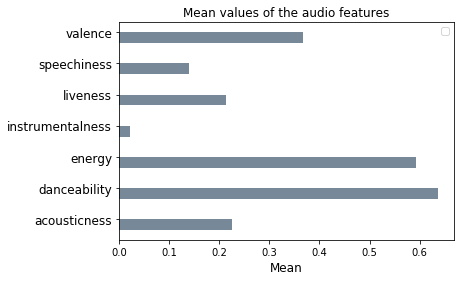

In [181]:
# Number of features
N = len(features.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, features.mean() , width, color = 'lightslategray')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(features)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

# Machine Learning - Clustering

In [228]:
spotify = final_df.loc[: ,['artist','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo','valence']]
spotify.head()

,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,{The Weeknd},0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175
1,{The Weeknd},0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107
2,{The Weeknd},0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290
3,{The Weeknd},0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155
4,{The Weeknd},0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361


In [229]:
# Import LabelEncode
from sklearn.preprocessing import LabelEncoder

In [230]:
# LabelEncoder obj 
enc = LabelEncoder()

In [231]:
# Set Labels
artist_label = enc.fit_transform(spotify.artist)

In [232]:
#Create column containing the labels
spotify['labels_artists'] = artist_label

In [233]:
spotify.head()

,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,labels_artists
0,{The Weeknd},0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,8
1,{The Weeknd},0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,8
2,{The Weeknd},0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,8
3,{The Weeknd},0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,8
4,{The Weeknd},0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,8


In [234]:
spotify = spotify.loc[: ,['labels_artists','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo','valence']]
spotify.head()

,labels_artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,8,0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175
1,8,0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107
2,8,0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290
3,8,0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155
4,8,0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adda4d0>,
      dtype=object)

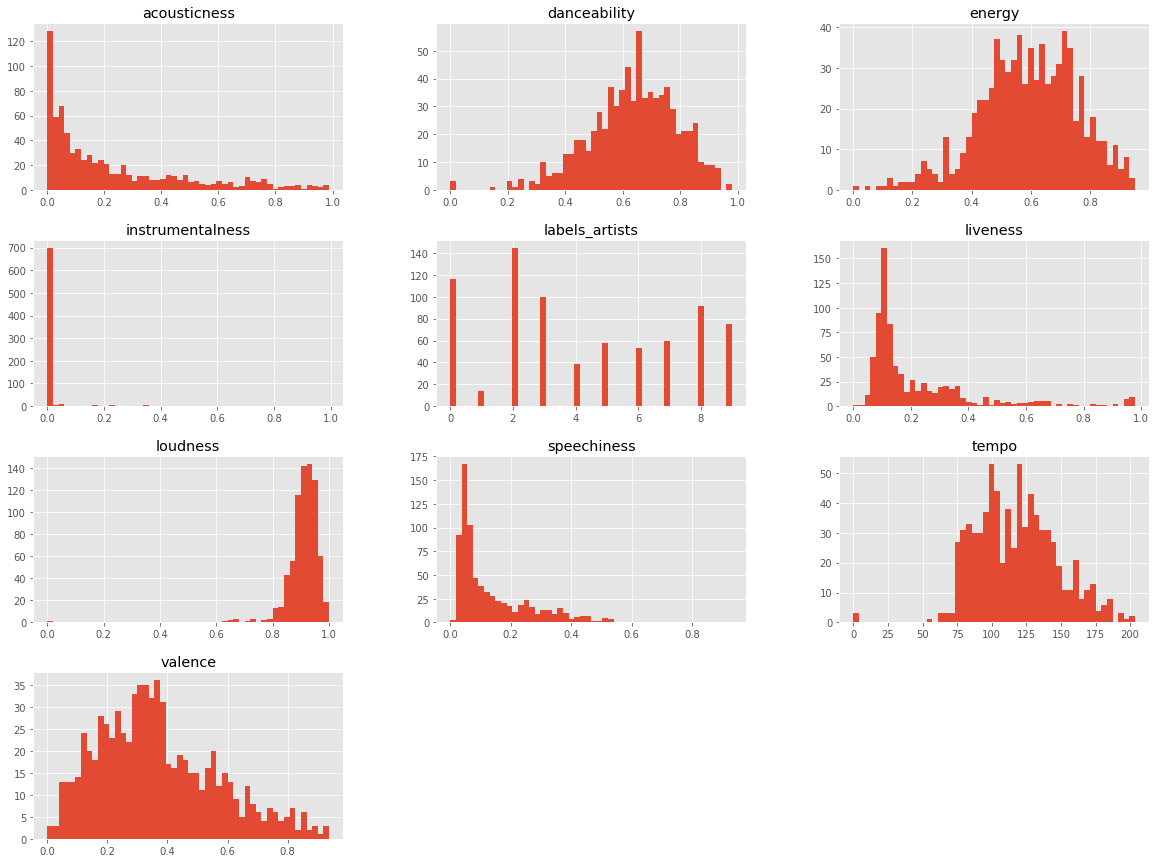

In [235]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = spotify[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
spotify['loudness'] = pd.DataFrame(loudness_scaled)

spotify.hist(bins=50,figsize=(20,15))

In [236]:
# remove song names, artist and id before clustering
songs_features = spotify.copy()
songs_features = songs_features.drop(['labels_artists'],axis=1)

In [237]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [238]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5869812090069971)
For n_clusters = 3, silhouette score is 0.5754545342977874)
For n_clusters = 4, silhouette score is 0.5489165471370528)
For n_clusters = 5, silhouette score is 0.5372239487187783)
For n_clusters = 6, silhouette score is 0.5494494051984855)
For n_clusters = 7, silhouette score is 0.5529872193114198)
For n_clusters = 8, silhouette score is 0.547720785581939)
For n_clusters = 9, silhouette score is 0.5345658137879696)
For n_clusters = 10, silhouette score is 0.5496872741003821)
For n_clusters = 11, silhouette score is 0.5552845153749117)
For n_clusters = 12, silhouette score is 0.5479487998596366)
For n_clusters = 13, silhouette score is 0.5371837859202465)
For n_clusters = 14, silhouette score is 0.5529257991276204)


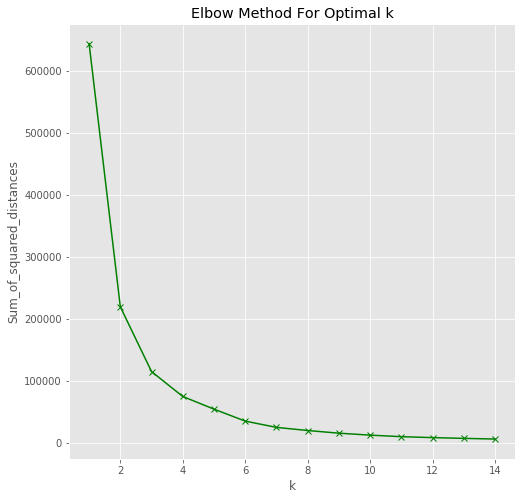

In [239]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [254]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [255]:
# PCA to reduce our data to 2 dimensions for visualization
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

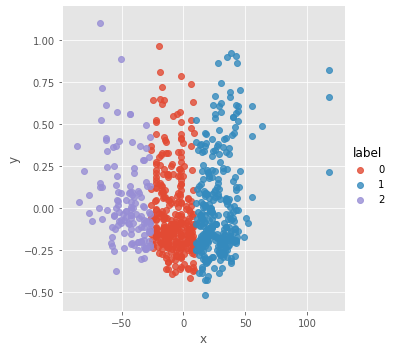

In [256]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [257]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

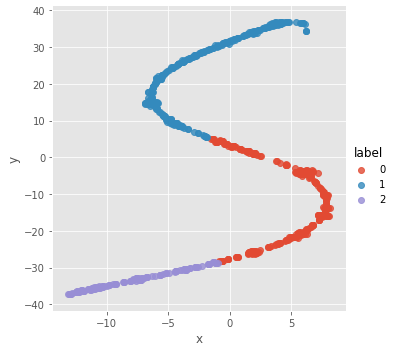

In [258]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [253]:
pca.explained_variance_ratio_

array([9.99748796e-01, 8.39575377e-05])

In [260]:
#Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  instrumentalness  liveness  \
PC-1      0.001153     -0.000477 -0.000738         -0.000041  0.000507   
PC-2      0.842710     -0.246230 -0.402907          0.025043 -0.034399   

      loudness  speechiness     tempo   valence  
PC-1 -0.000407    -0.000361 -0.999999 -0.000439  
PC-2 -0.100741    -0.000452  0.001512 -0.234341  


In [267]:
spotify['label'] = y_kmeans

# shuffle dataset

spotify = spotify.sample(frac=1)
spotify['label'].value_counts()

1    310
0    309
2    133
Name: label, dtype: int64

In [271]:
final_df['Cluster'] = spotify['label']

In [272]:
final_df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist,Cluster
0,"My Dear Melancholy,",1,09mEdoA6zrmBPgTEN5qXmN,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,0.170,0.461,0.593,0.000000,0.307,-4.954,0.0356,134.170,0.175,84,{The Weeknd},0
1,"My Dear Melancholy,",2,4ppTAJUbNXELZcoUaL90wo,Try Me,spotify:track:4ppTAJUbNXELZcoUaL90wo,0.596,0.456,0.679,0.000573,0.129,-5.778,0.0640,92.026,0.107,75,{The Weeknd},1
2,"My Dear Melancholy,",3,7DKS0rX27cCEPsK0R6tFWS,Wasted Times,spotify:track:7DKS0rX27cCEPsK0R6tFWS,0.610,0.560,0.678,0.000014,0.111,-6.167,0.0581,122.585,0.290,74,{The Weeknd},0
3,"My Dear Melancholy,",4,1cKHdTo9u0ZymJdPGSh6nq,I Was Never There,spotify:track:1cKHdTo9u0ZymJdPGSh6nq,0.142,0.323,0.737,0.000162,0.163,-4.008,0.0338,113.260,0.155,71,{The Weeknd},0
4,"My Dear Melancholy,",5,6QdnKD1zwEgyOWtkrdzlOF,Hurt You,spotify:track:6QdnKD1zwEgyOWtkrdzlOF,0.263,0.476,0.718,0.002610,0.109,-7.227,0.1490,183.932,0.361,73,{The Weeknd},2


In [294]:
just_features = spotify.loc[:,['acousticness','danceability','energy','instrumentalness',
                           'liveness','speechiness','valence','label']]
just_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,label
127,0.16900,0.531,0.7980,0.000000,0.834,0.4310,0.287,0
93,0.00769,0.777,0.8510,0.000000,0.140,0.0844,0.698,1
116,0.11400,0.584,0.7310,0.000035,0.607,0.2090,0.440,1
744,0.00104,0.813,0.5960,0.000000,0.176,0.0578,0.177,0
204,0.69900,0.317,0.4740,0.000000,0.945,0.0661,0.318,1
...,...,...,...,...,...,...,...,...
282,0.00251,0.745,0.9520,0.223000,0.367,0.0678,0.258,0
394,0.93500,0.319,0.0561,0.003840,0.388,0.0450,0.082,1
506,0.13300,0.807,0.3200,0.000328,0.101,0.0582,0.298,1
482,0.16500,0.774,0.9120,0.000000,0.745,0.3470,0.821,2


In [328]:
final_df[final_df['Cluster'] == 0].sample(10)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist,Cluster
558,What A Time To Be Alive,2,7jslhIiELQkgW9IHeYNOWE,Big Rings,spotify:track:7jslhIiELQkgW9IHeYNOWE,0.00196,0.776,0.675,0.000000,0.2270,-6.224,0.2660,131.984,0.271,63,{Drake},0
523,More Life,9,6UjfByV1lDLW0SOVQA4NAi,Gyalchester,spotify:track:6UjfByV1lDLW0SOVQA4NAi,0.03170,0.877,0.391,0.000502,0.0945,-8.196,0.0630,131.018,0.122,70,{Drake},0
664,Wiped Out!,5,2u0CelO5c81XS7z3dGpHbS,The Beach,spotify:track:2u0CelO5c81XS7z3dGpHbS,0.13100,0.245,0.640,0.000008,0.0766,-7.426,0.0608,135.739,0.105,66,{The Neighbourhood},0
375,Deadroses,3,6t2GvnsXlr0dELiQS7X75J,Ain't Trippin,spotify:track:6t2GvnsXlr0dELiQS7X75J,0.14700,0.656,0.413,0.000000,0.1600,-11.592,0.0624,144.069,0.492,52,{blackbear},0
177,These Things Happen,11,5DSr1NMci58MEgS20vivSL,Let's Get Lost (feat. Devon Baldwin),spotify:track:5DSr1NMci58MEgS20vivSL,0.10300,0.671,0.672,0.000040,0.0740,-9.188,0.1200,117.960,0.186,65,{G-Eazy},0
725,SR3MM,9,3d9XTk4jxEejqOU8MsLyiM,Growed Up - From Jxmtro,spotify:track:3d9XTk4jxEejqOU8MsLyiM,0.14600,0.867,0.766,0.000000,0.2810,-3.826,0.0470,117.020,0.675,41,{Rae Sremmurd},0
237,Sweetener,2,4mLkiFppf8Xvem6BSY34qw,blazed (feat. Pharrell Williams),spotify:track:4mLkiFppf8Xvem6BSY34qw,0.07930,0.795,0.759,0.000000,0.0805,-6.348,0.0528,110.021,0.855,60,{Ariana Grande},0
694,I Love You.,7,3vooOYHU0Fi3ViCG7Ozh0Y,W.D.Y.W.F.M?,spotify:track:3vooOYHU0Fi3ViCG7Ozh0Y,0.03030,0.557,0.845,0.008510,0.3540,-2.926,0.0346,123.997,0.508,61,{The Neighbourhood},0
382,Deadroses,10,3cuW0sgJND4ZkdN1m7m7Gg,Deadroses,spotify:track:3cuW0sgJND4ZkdN1m7m7Gg,0.69700,0.612,0.536,0.000000,0.1310,-6.537,0.1570,132.251,0.603,62,{blackbear},0
35,Beauty Behind The Madness,9,4frLb7nWtsz2ymBE6k2GRP,Earned It (Fifty Shades Of Grey),spotify:track:4frLb7nWtsz2ymBE6k2GRP,0.40800,0.647,0.291,0.000000,0.0771,-8.275,0.0363,119.839,0.400,71,{The Weeknd},0


In [297]:
just_features[just_features['label']==0].mean().sort_values(ascending = False)

danceability        0.677731
energy              0.590770
valence             0.366815
liveness            0.216456
acousticness        0.194417
speechiness         0.117759
instrumentalness    0.020404
label               0.000000
dtype: float64

In [332]:
final_df[final_df['Cluster'] == 1].sample(10)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist,Cluster
580,If You're Reading This It's Too Late,13,4zLOwx1yRJXWkHKt1XzF1p,Now & Forever,spotify:track:4zLOwx1yRJXWkHKt1XzF1p,0.12400,0.555,0.481,0.000000,0.1010,-7.419,0.0322,107.806,0.0981,59,{Drake},1
472,So Far Gone,1,1v24T2ug4TlssYZvI3aL4O,Lust For Life,spotify:track:1v24T2ug4TlssYZvI3aL4O,0.93900,0.462,0.422,0.032700,0.1080,-10.381,0.1750,87.364,0.0853,61,{Drake},1
591,Nothing Was The Same (Deluxe),8,6jdOi5U5LBzQrc4c1VT983,"Hold On, We're Going Home",spotify:track:6jdOi5U5LBzQrc4c1VT983,0.00411,0.773,0.414,0.000034,0.0733,-7.436,0.0961,99.993,0.2890,72,{Drake},1
62,Trilogy,1,5fohLPNqO6TqwrZ7BoUWUT,High For This,spotify:track:5fohLPNqO6TqwrZ7BoUWUT,0.74400,0.465,0.403,0.000667,0.0777,-8.895,0.0755,74.950,0.0687,69,{The Weeknd},1
228,"thank u, next",5,3wFLWP0FcIqHK1wb1CPthQ,fake smile,spotify:track:3wFLWP0FcIqHK1wb1CPthQ,0.32900,0.450,0.619,0.000000,0.3190,-7.412,0.3720,83.300,0.4270,75,{Ariana Grande},1
106,B-Sides,7,07QHUGEZjOGsExKGefXgJW,It's Eazy,spotify:track:07QHUGEZjOGsExKGefXgJW,0.00801,0.778,0.434,0.000000,0.1110,-7.090,0.3060,100.101,0.4770,58,{G-Eazy},1
303,My Everything (Deluxe),11,1rNop31kdDmSj3Ds6xhIeS,Hands On Me,spotify:track:1rNop31kdDmSj3Ds6xhIeS,0.21400,0.662,0.766,0.000000,0.3240,-5.694,0.0377,97.959,0.3760,55,{Ariana Grande},1
708,SR3MM,1,20NeQXq8WWCG89ul5nH4BP,Touchscreen Navigation - From Swaecation,spotify:track:20NeQXq8WWCG89ul5nH4BP,0.51800,0.729,0.523,0.000001,0.1040,-6.348,0.1020,87.999,0.0791,50,{Rae Sremmurd},1
653,Hard To Imagine The Neighbourhood Ever Changing,15,0f7T8FO4ZM9XHpmncSUWND,Flowers,spotify:track:0f7T8FO4ZM9XHpmncSUWND,0.01790,0.559,0.600,0.016300,0.2040,-7.002,0.0248,100.029,0.2990,52,{The Neighbourhood},1
483,So Far Gone,12,0q7LGcVSpsIoSbjChtZ8lI,Uptown (feat. Bun B & Lil Wayne),spotify:track:0q7LGcVSpsIoSbjChtZ8lI,0.00391,0.416,0.824,0.000000,0.1040,-3.075,0.3430,85.433,0.4170,62,{Drake},1


In [298]:
just_features[just_features['label']==1].mean().sort_values(ascending = False)

label               1.000000
danceability        0.611719
energy              0.578126
valence             0.354209
acousticness        0.265535
liveness            0.219613
speechiness         0.144138
instrumentalness    0.020909
dtype: float64

In [335]:
final_df[final_df['Cluster'] == 2].sample(10)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist,Cluster
9,Starboy,3,4oeaIftdpT3JuZLcCkKmVE,False Alarm,spotify:track:4oeaIftdpT3JuZLcCkKmVE,0.0324,0.518,0.676,0.000036,0.1890,-6.373,0.0744,173.998,0.197,70,{The Weeknd},2
731,SremmLife 2 (Deluxe),5,6fujklziTHa8uoM5OQSfIo,Black Beatles,spotify:track:6fujklziTHa8uoM5OQSfIo,0.1420,0.794,0.632,0.000000,0.1280,-6.163,0.0649,145.926,0.355,77,{Rae Sremmurd},2
36,Beauty Behind The Madness,10,25KybV9BOUlvcnv7nN3Pyo,In The Night,spotify:track:25KybV9BOUlvcnv7nN3Pyo,0.0796,0.505,0.680,0.000000,0.0465,-4.990,0.0713,168.021,0.539,72,{The Weeknd},2
96,Scary Nights,5,6zD2XsRF3r7TMuwo6aZE7W,K I D S (feat. Dex Lauper),spotify:track:6zD2XsRF3r7TMuwo6aZE7W,0.0419,0.591,0.828,0.000000,0.0925,-5.716,0.4170,175.842,0.453,56,{G-Eazy},2
600,~how i'm feeling~,1,3vUc9WQpoca15404jNdzf9,Changes,spotify:track:3vUc9WQpoca15404jNdzf9,0.4520,0.532,0.455,0.000000,0.2370,-8.366,0.1560,148.182,0.204,0,{Lauv},2
637,I met you when I was 18. (the extras),13,1al6XBqWFTLkT6SfyKR481,The Other - Matisse & Sadko Remix,spotify:track:1al6XBqWFTLkT6SfyKR481,0.0174,0.431,0.590,0.000000,0.2510,-6.053,0.0637,179.784,0.283,48,{Lauv},2
123,The Beautiful & Damned,17,3DgoM4s0T7VoHEQkp3xUsW,Mama Always Told Me,spotify:track:3DgoM4s0T7VoHEQkp3xUsW,0.0169,0.747,0.714,0.000000,0.1380,-5.123,0.1400,144.969,0.461,55,{G-Eazy},2
419,beerbongs & bentleys,6,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,0.1240,0.585,0.520,0.000070,0.1310,-6.136,0.0712,159.801,0.129,88,{Post Malone},2
724,SR3MM,8,40ZQBmv6mvSM9y8SSVV4kS,Juggling Biddies (feat. Riff 3x) - From Jxmtro,spotify:track:40ZQBmv6mvSM9y8SSVV4kS,0.0703,0.731,0.783,0.000000,0.1430,-5.692,0.1090,147.757,0.621,38,{Rae Sremmurd},2
386,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",4,3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,spotify:track:3XF5xLJHOQQRbWya6hBp7d,0.4620,0.678,0.533,0.219000,0.1390,-10.485,0.1860,150.455,0.323,85,{Billie Eilish},2


In [299]:
just_features[just_features['label']==2].mean().sort_values(ascending = False)

label               2.000000
energy              0.630230
danceability        0.597782
valence             0.393713
acousticness        0.206412
liveness            0.194969
speechiness         0.181914
instrumentalness    0.028491
dtype: float64

## Cluster 0 = Nighttime
## Cluster 1 = Party Jams
## Cluster 2 = Rap
#### but like I think if anything, this analysis shows that my music taste as a whole is not very diversified

In [314]:
barons_features = just_features.loc[:,['acousticness','danceability','energy','instrumentalness',
                           'liveness','speechiness','valence']]
barons_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
127,0.16900,0.531,0.7980,0.000000,0.834,0.4310,0.287
93,0.00769,0.777,0.8510,0.000000,0.140,0.0844,0.698
116,0.11400,0.584,0.7310,0.000035,0.607,0.2090,0.440
744,0.00104,0.813,0.5960,0.000000,0.176,0.0578,0.177
204,0.69900,0.317,0.4740,0.000000,0.945,0.0661,0.318
...,...,...,...,...,...,...,...
282,0.00251,0.745,0.9520,0.223000,0.367,0.0678,0.258
394,0.93500,0.319,0.0561,0.003840,0.388,0.0450,0.082
506,0.13300,0.807,0.3200,0.000328,0.101,0.0582,0.298
482,0.16500,0.774,0.9120,0.000000,0.745,0.3470,0.821


In [315]:
barons_features.std().mean()

0.16980460740721362

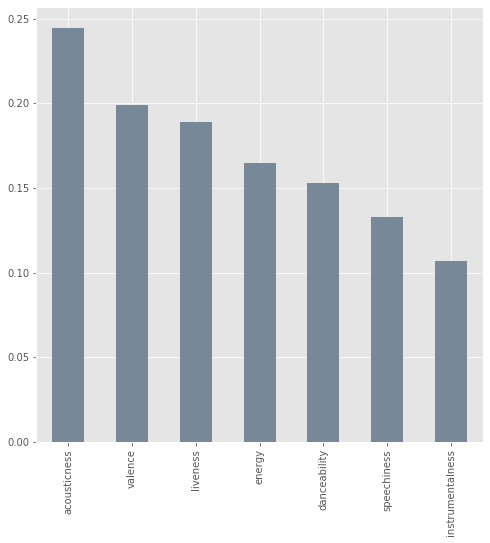

In [316]:
barons_features.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

In [322]:
songs_features = songs_features.loc[:,['acousticness','danceability','instrumentalness',
                           'liveness','speechiness']] #
#valence is removed due to multicollinearity with danceability and energy

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [324]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [325]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[67 29  5]
 [38 67  3]
 [18 13  9]]


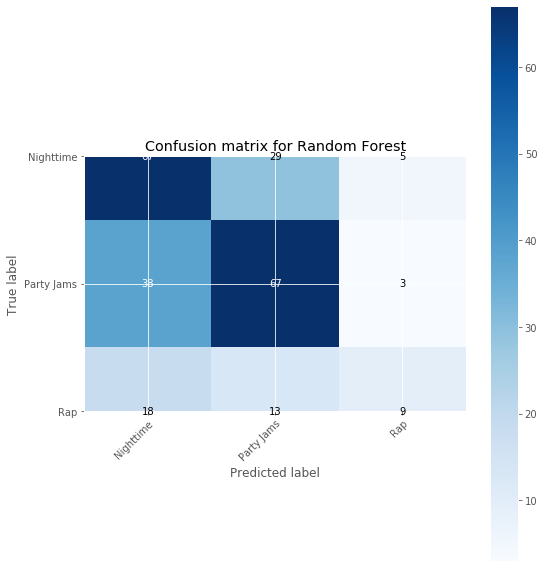

In [336]:
# Confusion matrix
definitions = ['Nighttime','Party Jams','Rap']
# reversefactor = dict(zip(range(3),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [337]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('acousticness', 0.20807698371957875),
 ('danceability', 0.2347626435139764),
 ('instrumentalness', 0.116836087856863),
 ('liveness', 0.21282436060831303),
 ('speechiness', 0.22749992430126875)]

In [338]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [339]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[59 38  4]
 [54 52  2]
 [29  7  4]]


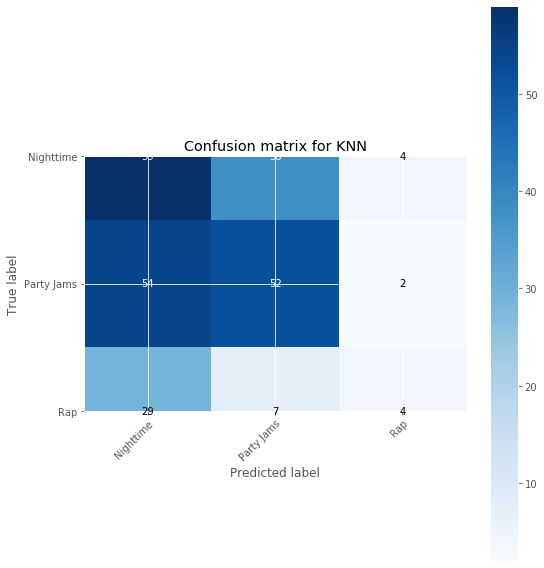

In [340]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [341]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[80 21  0]
 [63 45  0]
 [24 16  0]]


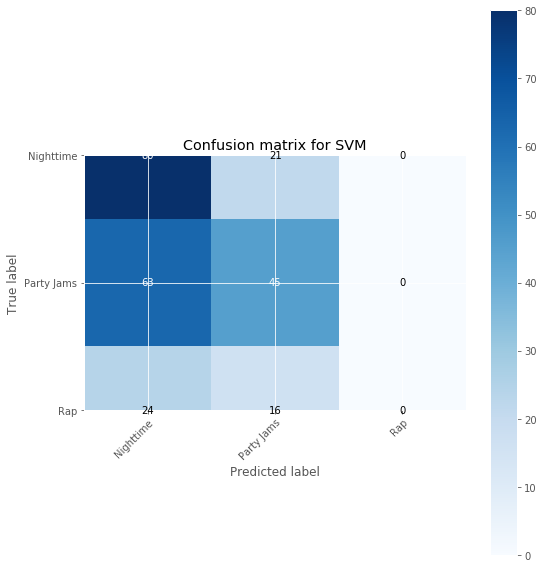

In [342]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [343]:
from sklearn.neural_network import MLPClassifier

In [344]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [345]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[70 31  0]
 [50 57  1]
 [24 15  1]]


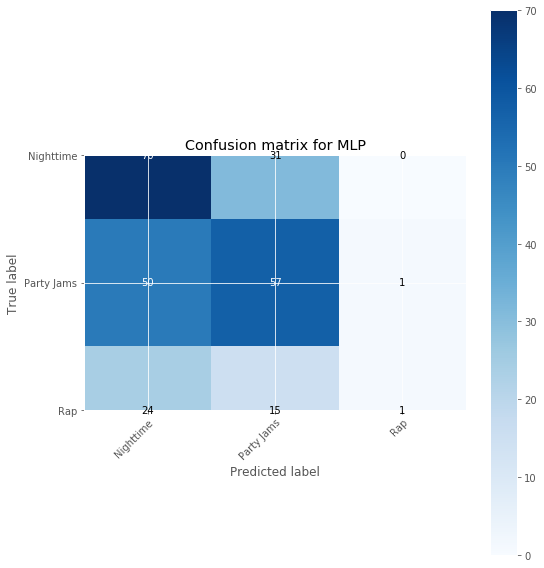

In [346]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [347]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

   Nighttime       0.49      0.69      0.57       101
  Party Jams       0.55      0.53      0.54       108
         Rap       0.50      0.03      0.05        40

    accuracy                           0.51       249
   macro avg       0.51      0.42      0.39       249
weighted avg       0.52      0.51      0.47       249
MLP


In [348]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

   Nighttime       0.48      0.79      0.60       101
  Party Jams       0.55      0.42      0.47       108
         Rap       0.00      0.00      0.00        40

    accuracy                           0.50       249
   macro avg       0.34      0.40      0.36       249
weighted avg       0.43      0.50      0.45       249
SVM


/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [349]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

   Nighttime       0.42      0.58      0.49       101
  Party Jams       0.54      0.48      0.51       108
         Rap       0.40      0.10      0.16        40

    accuracy                           0.46       249
   macro avg       0.45      0.39      0.38       249
weighted avg       0.47      0.46      0.44       249
KNN


In [350]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

   Nighttime       0.54      0.66      0.60       101
  Party Jams       0.61      0.62      0.62       108
         Rap       0.53      0.23      0.32        40

    accuracy                           0.57       249
   macro avg       0.56      0.50      0.51       249
weighted avg       0.57      0.57      0.56       249
forest


### Random Forest is the most accurate

In [352]:
spotify_rf = pd.DataFrame(data={'Actual Cluster': y_test,
                                         'Cluster Prediction': y_pred})
spotify_rf.reset_index(inplace=True)
spotify_rf

,index,Actual Cluster,Cluster Prediction
0,0,2,0
1,1,0,0
2,2,0,0
3,3,2,0
4,4,0,1
...,...,...,...
244,244,2,0
245,245,1,0
246,246,0,0
247,247,1,1


In [354]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('RMSE for random forest:', np.sqrt(mean_squared_error(spotify_rf['Actual Cluster'], spotify_rf['Cluster Prediction'])))
print('MAE for random forest:', mean_absolute_error(spotify_rf['Actual Cluster'], spotify_rf['Cluster Prediction']))

RMSE for random forest: 0.8383383833392812
MAE for random forest: 0.5180722891566265


## We are slightly better than average here ^

#### What did I learn here? I learned that, on average, the music I listen to is high in danceability and energy. Even my songs that I would categorize as sad (like "The Birds pt.1-2 by the Weeknd) might be low in valence, or positivity, but are high in energy and are lyrical. Also, my music is not very diverse as my top 10 favorite artists are quite similar.

#### From Tableau, I learned that I actually listened to about 79,000 music of music in 2019 (contrary to the 66,000 presented by Spotify Wrapped. Also, I found that at different times of day, I listen to different music. During the morning, I listen to slower, more uplifting, songs. During the afternoon, especially around gym time (12-2PM), there's a surge in EDM and house like Chainsmokers and David Guetta. And for the evening, I listen to all my favorites (frequents on the top 10). Additionally, I have an upwards trend of time spent listening to music throughout the year. And finally, my peaks of listening is around 12 PM and 11PM-1AM in the middle of the night when I am either going out or studying. My recent interest in the My Favorite Murder podcast is the reason for a spike in listenership in the 7AM hour.